# House Price Prediction

## Problem statement
To build a regression model for a US-based housing company named Surprise Housing that has decided to enter the Australian market and intends to use data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The data set based on the sale of houses in Australia has been provided and the objective is to design a model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Business Goal
(1) Understanding which variables are significant in predicting the price of a house, and <br>
(2) How well those variables describe the price of a house.

## Step 1: Reading and Understanding the Data

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [194]:
housing_df = pd.read_csv("C:/Users/soura/OneDrive/Desktop/UpGrad- AI & ML/Advance Regression/train.csv")
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [195]:
housing_df.shape

(1460, 81)

In [196]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [197]:
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Step 2: Data Cleaning and Manipulation

In [198]:
##Stripping off white_spaces from the column name(if any)
housing_df = housing_df.rename(columns= lambda x: x.strip(), inplace=False)

In [199]:
##Checking and dropping duplicated records(if any)
housing_df = housing_df.drop_duplicates()

In [200]:
##Check null values if any(column wise: missing value percentage)
missing_val_cols_prcnt = round(100*housing_df.isnull().sum()/len(housing_df.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0])
missing

0
LotFrontage   17.74
Alley         93.77
MasVnrType    59.73
MasVnrArea     0.55
BsmtQual       2.53
BsmtCond       2.53
BsmtExposure   2.60
BsmtFinType1   2.53
BsmtFinType2   2.60
Electrical     0.07
FireplaceQu   47.26
GarageType     5.55
GarageYrBlt    5.55
GarageFinish   5.55
GarageQual     5.55
GarageCond     5.55
PoolQC        99.52
Fence         80.75
MiscFeature   96.30

In [201]:
# Missing values dataframe (sorting values for graph)
my_cols = missing.index
vals = missing[0]
missing_df = pd.DataFrame({'features':my_cols,'percent':vals})
missing_df = missing_df.sort_values(by='percent', ascending=False)

#### 'Null Values Percentages' in the housing dataset, df: Barplot

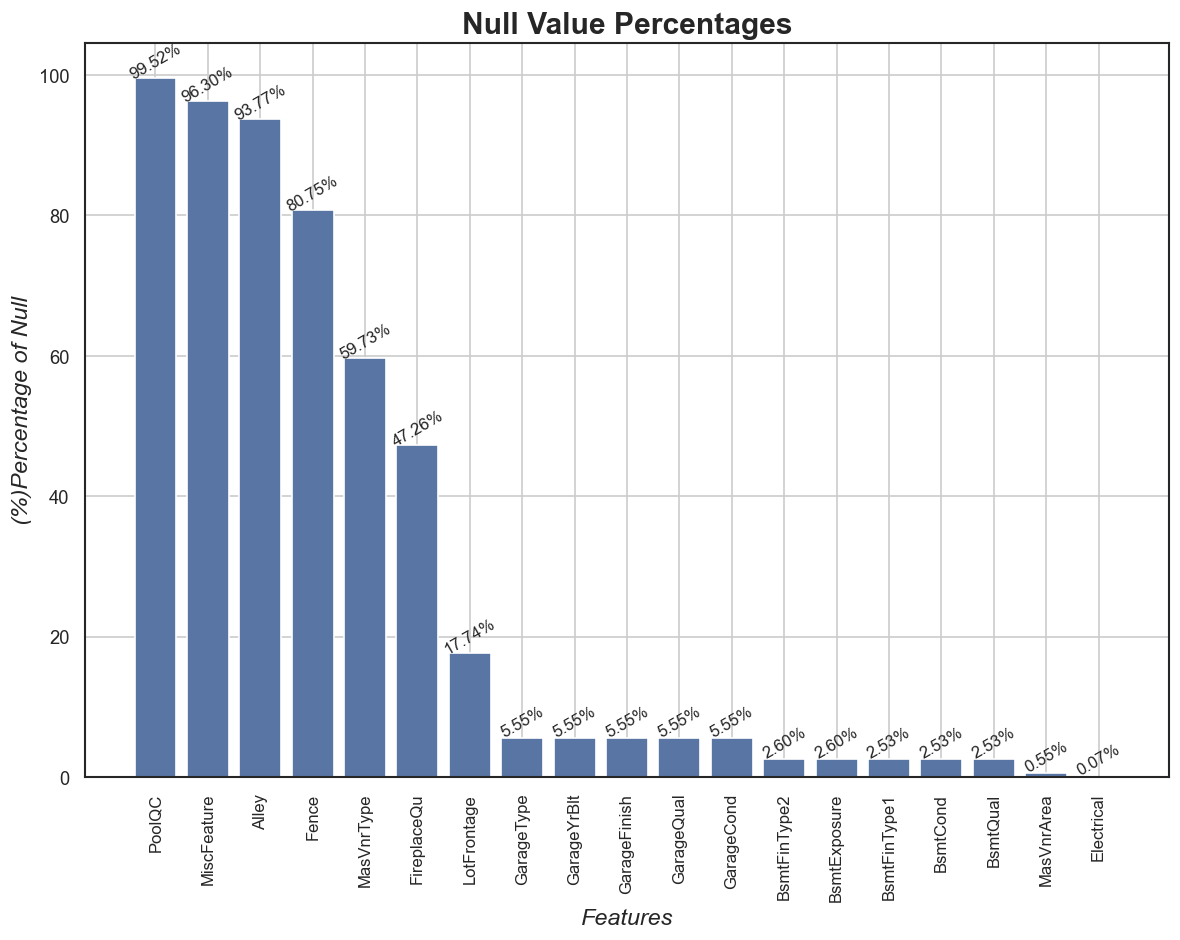

In [202]:
sns.set(style='white')
plt.figure(figsize=(10,8), dpi=120)
ax_x= sns.barplot(x=missing_df.features, y=missing_df.percent)

for p in ax_x.patches:
    ax_x.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize =10, rotation=30)
plt.xticks(rotation=90, fontsize=10)        
plt.xlabel('Features', fontsize= 14, fontstyle='italic')
plt.ylabel('(%)Percentage of Null' , fontsize= 14, fontstyle='italic')
plt.title('Null Value Percentages', fontsize=18,fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()


#### Separating the Numerical and Categorical features for analysis

In [203]:
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

In [204]:
# Numerical features in the dataframe
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Analyzing Numerical Data

#### Outlier Detection

`Checking percentage of outliers for all the numerical columns.`

In [205]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

Features  Percentage
30  EnclosedPorch       14.25
10     BsmtFinSF2       11.44
5     OverallCond        8.56
32    ScreenPorch        7.95
1      MSSubClass        7.05
8      MasVnrArea        6.58
2     LotFrontage        6.03
18   BsmtHalfBath        5.62
29    OpenPorchSF        5.27
3         LotArea        4.73
22   KitchenAbvGr        4.66
12    TotalBsmtSF        4.18
37      SalePrice        4.18
34        MiscVal        3.56
21   BedroomAbvGr        2.40
28     WoodDeckSF        2.19
16      GrLivArea        2.12
23   TotRmsAbvGrd        2.05
11      BsmtUnfSF        1.99
15   LowQualFinSF        1.78
31      3SsnPorch        1.64
27     GarageArea        1.44
13       1stFlrSF        1.37
9      BsmtFinSF1        0.48
33       PoolArea        0.48
6       YearBuilt        0.48
24     Fireplaces        0.34
26     GarageCars        0.34
14       2ndFlrSF        0.14
4     OverallQual        0.14
17   BsmtFullBath        0.07
35         MoSold        0.00
36         YrSold        0.00
0              Id        0.00
25    GarageYrBlt        0.00
20       HalfBath        0.00
7    YearRemodAdd        0.00
19       FullBath        0.00

**Comment:**
- Majority of the numeric features  have outliers
- Dropping all the outliers will cause loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of **[25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]**
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded in thisn this

In [206]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25) 
        max_value = housing_df[feature].quantile(.75)+1.5*IQR
        min_value = housing_df[feature].quantile(.25)-1.5*IQR
        housing_df[feature][housing_df[feature] > max_value] = max_value
        housing_df[feature][housing_df[feature] < min_value ] = min_value

In [207]:
# Checking the dataset after reassigning minmum and maximum values

housing_df.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000   1460.000000  1460.000000   
mean    730.500000    55.085616    69.134888   9647.388014     6.100685   
std     421.610009    37.508183    19.662022   3594.356399     1.378430   
min       1.000000    20.000000    27.500000   1481.500000     2.000000   
25%     365.750000    20.000000    59.000000   7553.500000     5.000000   
50%     730.500000    50.000000    69.000000   9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000  11601.500000     7.000000   
max    1460.000000   145.000000   111.500000  17673.500000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.543493  1971.299315   1984.865753    90.192149   439.997517  ...   
std       0.963696    30.108397     20.645407   134.925253   433.219435  ...   
min       3.500000  1885.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       7.500000  2010.000000   2010.000000   415.000000  1780.625000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000         1460.0     1460.0       1460.0   
mean     91.806849    42.603425            0.0        0.0          0.0   
std     116.658120    52.501584            0.0        0.0          0.0   
min       0.000000     0.000000            0.0        0.0          0.0   
25%       0.000000     0.000000            0.0        0.0          0.0   
50%       0.000000    25.000000            0.0        0.0          0.0   
75%     168.000000    68.000000            0.0        0.0          0.0   
max     420.000000   170.000000            0.0        0.0          0.0   

       PoolArea  MiscVal       MoSold       YrSold      SalePrice  
count    1460.0   1460.0  1460.000000  1460.000000    1460.000000  
mean        0.0      0.0     6.321918  2007.815753  180921.195890  
std         0.0      0.0     2.703626     1.328095   79442.502883  
min         0.0      0.0     1.000000  2006.000000   34900.000000  
25%         0.0      0.0     5.000000  2007.000000  129975.000000  
50%         0.0      0.0     6.000000  2008.000000  163000.000000  
75%         0.0      0.0     8.000000  2009.000000  214000.000000  
max         0.0      0.0    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Correlation in Numeric Data


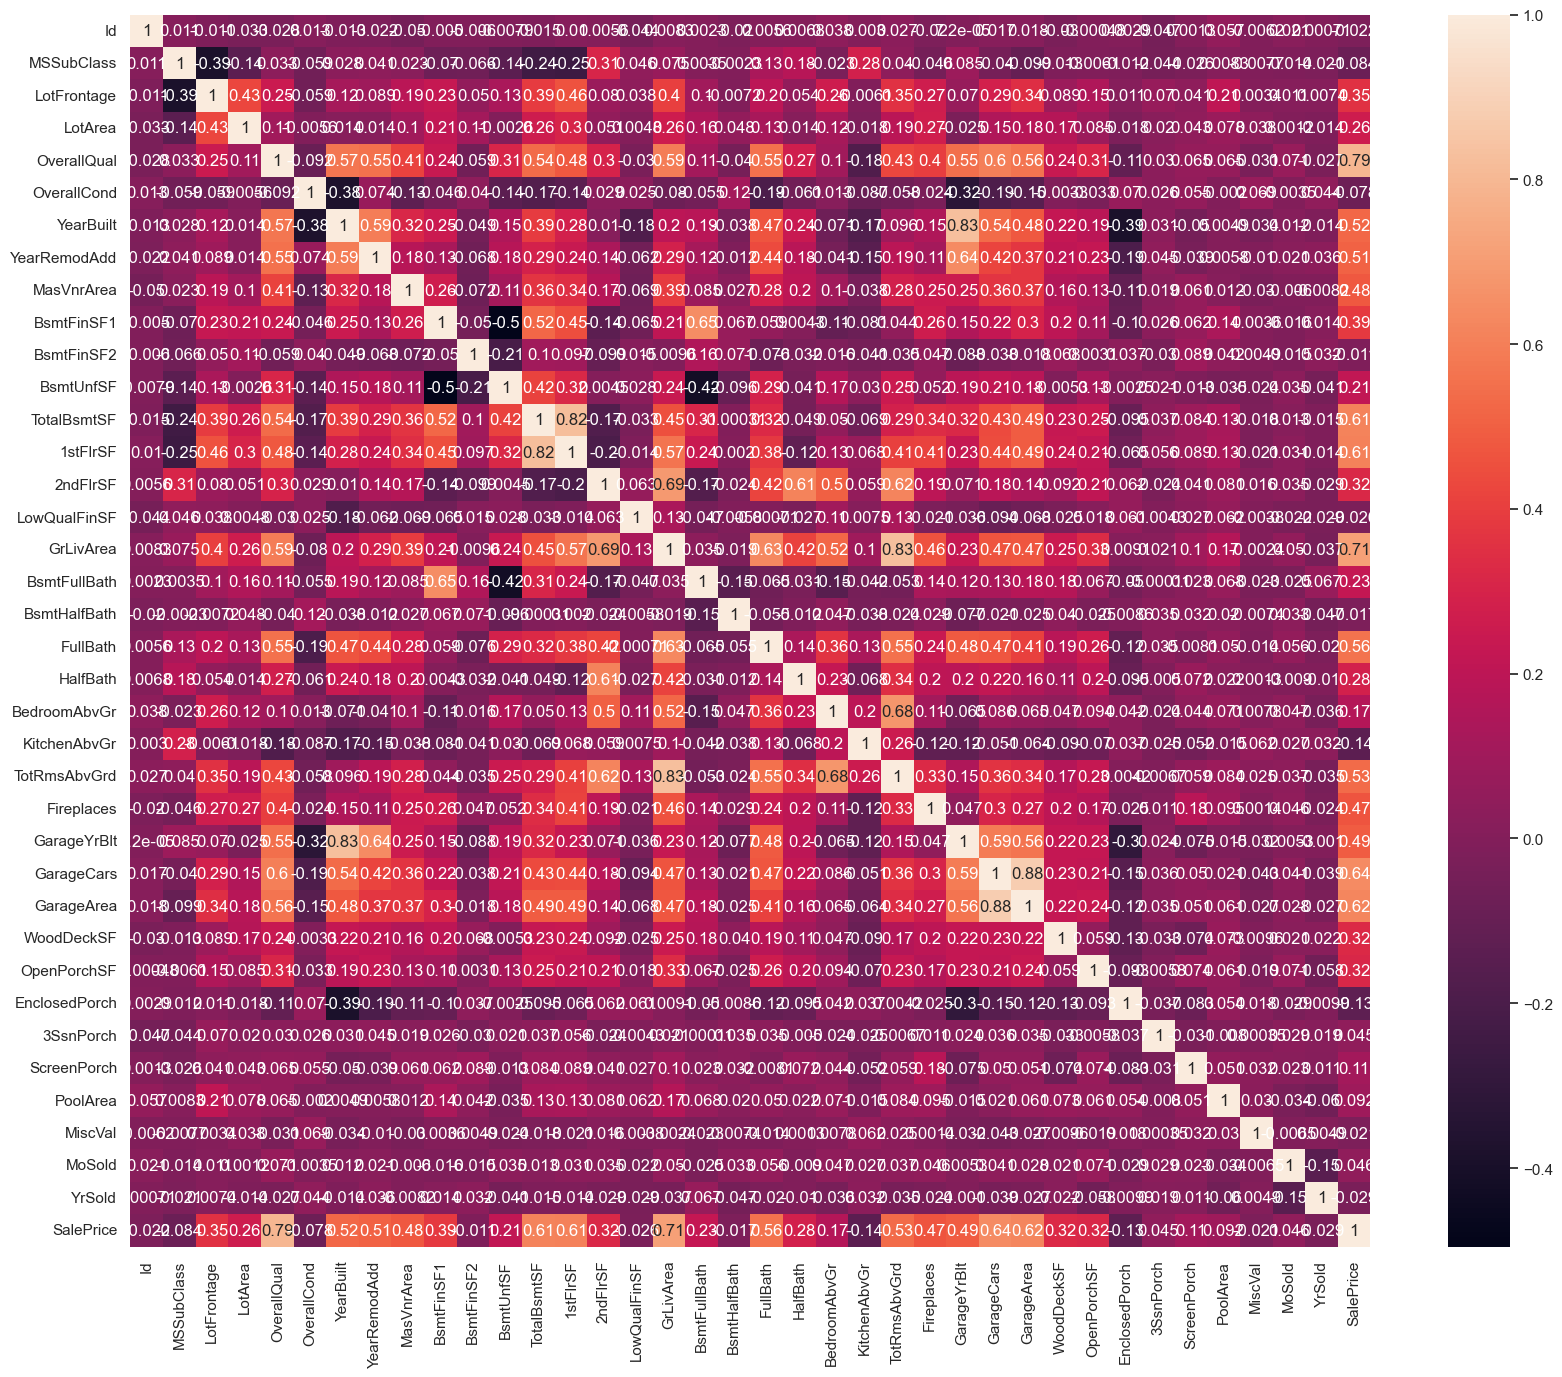

In [208]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

**Comment**
- Some of the features have high correlation with each other
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

One feature from each of these pair will be dropped after data visualization.

#### Univariate and Bivariate Analysis - Numerical Features

##### Analyzing Numerical Features with continuous values

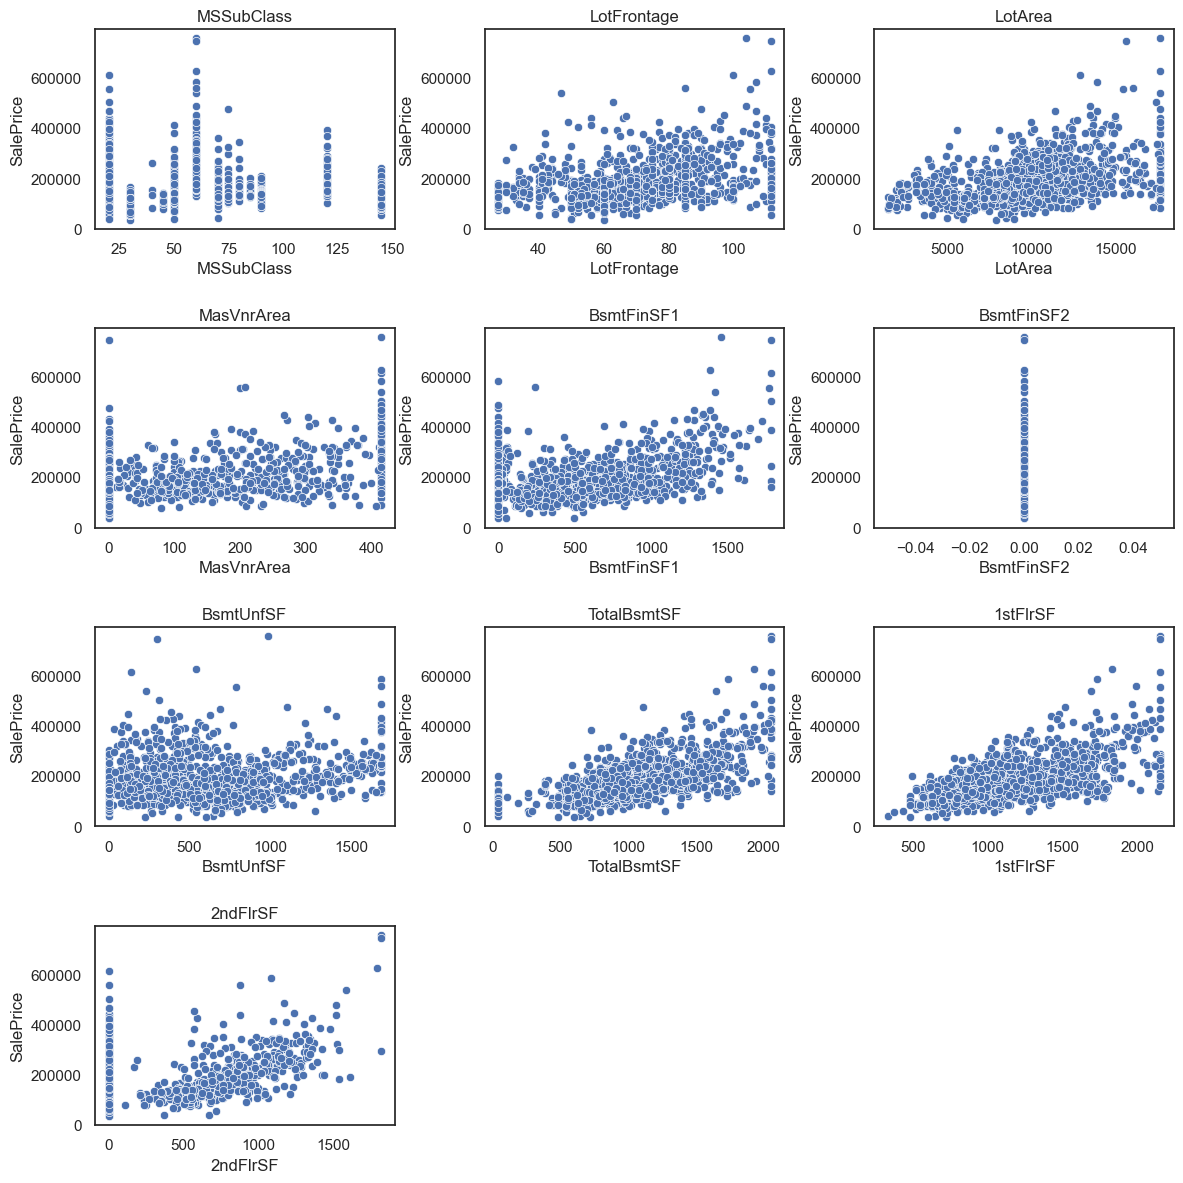

In [209]:
# Create a figure with a specified size
fig = plt.figure(figsize=(12, 12))

# List of features to plot
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']

# Loop through the features and create a subplot for each
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.title(feature)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjusted for better spacing

plt.show()

**Comment:**

- Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.
- 'MSSubClass' has discrete values
- 'BsmtSF2' has single value and can be dropped.

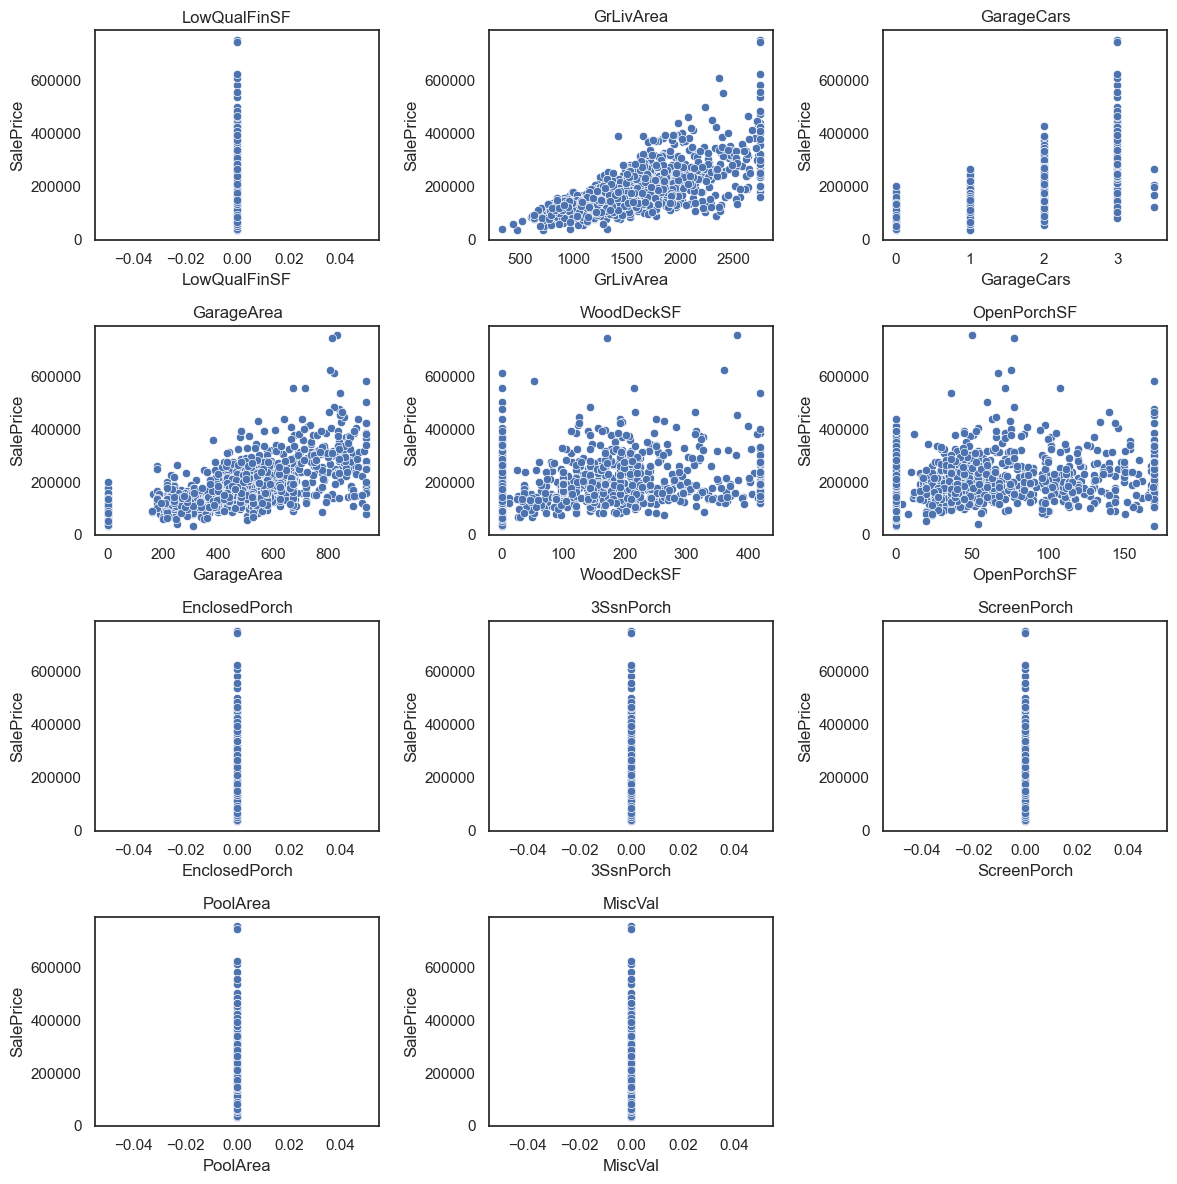

In [210]:
# Create a figure with a specified size
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

# List of features to plot
features = ['LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
            'PoolArea', 'MiscVal']

# Loop through the features and create a subplot for each
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'], ax=ax)
    ax.set_title(feature)

# Remove any empty subplots if there are less features than grid size
for j in range(len(features), 12):
    fig.delaxes(axes.flatten()[j])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

**Comment**
- 'GrLivArea' and 'GarageArea' are showing positive correlation with SalePrice.
- 'LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.

##### Visualizing the distribution of the numeric features

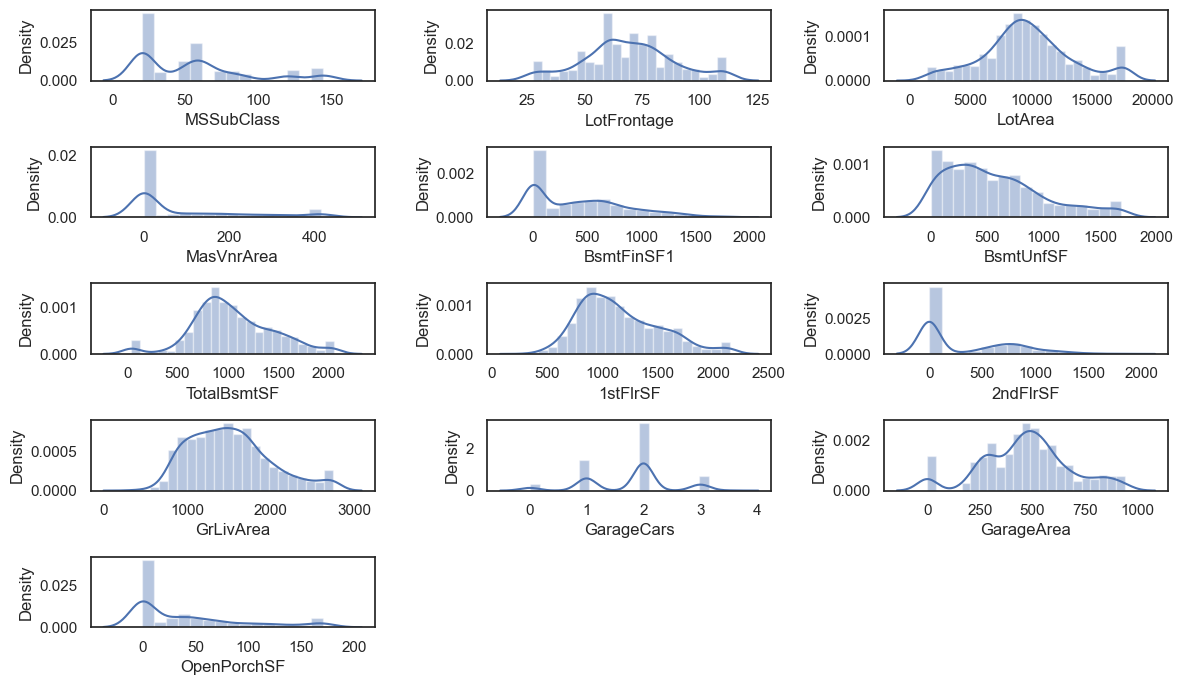

In [211]:
fig=plt.figure(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing_df[feature])
    plt.tight_layout()

In [212]:
housing_df[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

LowQualFinSF    GrLivArea   GarageCars   GarageArea   WoodDeckSF  \
count        1460.0  1460.000000  1460.000000  1460.000000  1460.000000   
mean            0.0  1503.735873     1.765411   470.670719    91.806849   
std             0.0   481.375641     0.742753   207.105729   116.658120   
min             0.0   334.000000     0.000000     0.000000     0.000000   
25%             0.0  1129.500000     1.000000   334.500000     0.000000   
50%             0.0  1464.000000     2.000000   480.000000     0.000000   
75%             0.0  1776.750000     2.000000   576.000000   168.000000   
max             0.0  2747.625000     3.500000   938.250000   420.000000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  
count  1460.000000         1460.0     1460.0       1460.0    1460.0   1460.0  
mean     42.603425            0.0        0.0          0.0       0.0      0.0  
std      52.501584            0.0        0.0          0.0       0.0      0.0  
min       0.000000            0.0        0.0          0.0       0.0      0.0  
25%       0.000000            0.0        0.0          0.0       0.0      0.0  
50%      25.000000            0.0        0.0          0.0       0.0      0.0  
75%      68.000000            0.0        0.0          0.0       0.0      0.0  
max     170.000000            0.0        0.0          0.0       0.0      0.0

Removing these features having fixed values as they won't contribute in predicting SalePrice

In [213]:
housing_df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

LowQualFinSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal
count        1460.0         1460.0     1460.0       1460.0    1460.0   1460.0
mean            0.0            0.0        0.0          0.0       0.0      0.0
std             0.0            0.0        0.0          0.0       0.0      0.0
min             0.0            0.0        0.0          0.0       0.0      0.0
25%             0.0            0.0        0.0          0.0       0.0      0.0
50%             0.0            0.0        0.0          0.0       0.0      0.0
75%             0.0            0.0        0.0          0.0       0.0      0.0
max             0.0            0.0        0.0          0.0       0.0      0.0

In [214]:
housing_df.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

##### Analyzing Numerical Features with Discrete Values

In [215]:
housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

OverallQual  OverallCond  MoSold  YrSold  BsmtFullBath  BsmtHalfBath  \
0               7          5.0       2    2008           1.0             0   
1               6          7.5       5    2007           0.0             0   
2               7          5.0       9    2008           1.0             0   
3               7          5.0       2    2006           1.0             0   
4               8          5.0      12    2008           1.0             0   
5               5          5.0      10    2009           1.0             0   
6               8          5.0       8    2007           1.0             0   
7               7          6.0      11    2009           1.0             0   
8               7          5.0       4    2008           0.0             0   
9               5          6.0       1    2008           1.0             0   
10              5          5.0       2    2008           1.0             0   
11              9          5.0       7    2006           1.0             0   
12              5          6.0       9    2008           1.0             0   
13              7          5.0       8    2007           0.0             0   
14              6          5.0       5    2008           1.0             0   
15              7          7.5       7    2007           0.0             0   
16              6          7.0       3    2010           1.0             0   
17              4          5.0      10    2006           0.0             0   
18              5          5.0       6    2008           1.0             0   
19              5          6.0       5    2009           0.0             0   
20              8          5.0      11    2006           0.0             0   
21              7          7.0       6    2007           0.0             0   
22              8          5.0       9    2008           0.0             0   
23              5          7.0       6    2007           1.0             0   
24              5          7.5       5    2010           1.0             0   
25              8          5.0       7    2009           0.0             0   
26              5          7.0       5    2010           0.0             0   
27              8          5.0       5    2010           1.0             0   
28              5          6.0      12    2006           1.0             0   
29              4          6.0       5    2008           0.0             0   
30              4          4.0       7    2008           0.0             0   
31              5          6.0       6    2008           0.0             0   
32              8          5.0       1    2008           0.0             0   
33              5          5.0       4    2010           0.0             0   
34              9          5.0       8    2007           1.0             0   
35              8          5.0       9    2006           0.0             0   
36              5          5.0       6    2009           0.0             0   
37              5          6.0      10    2009           0.0             0   
38              5          7.0       1    2010           1.0             0   
39              4          5.0       6    2008           0.0             0   
40              6          5.0      12    2006           0.0             0   
41              5          6.0       7    2007           0.0             0   
42              5          7.0      12    2007           1.0             0   
43              5          6.0       7    2008           1.0             0   
44              5          6.0       5    2006           1.0             0   
45              9          5.0       2    2010           1.0             0   
46              7          5.0       8    2009           1.0             0   
47              8          5.0       7    2007           0.0             0   
48              4          5.0       6    2009           0.0             0   
49              5          7.0       1    2007           1.0             0   
50              6          6

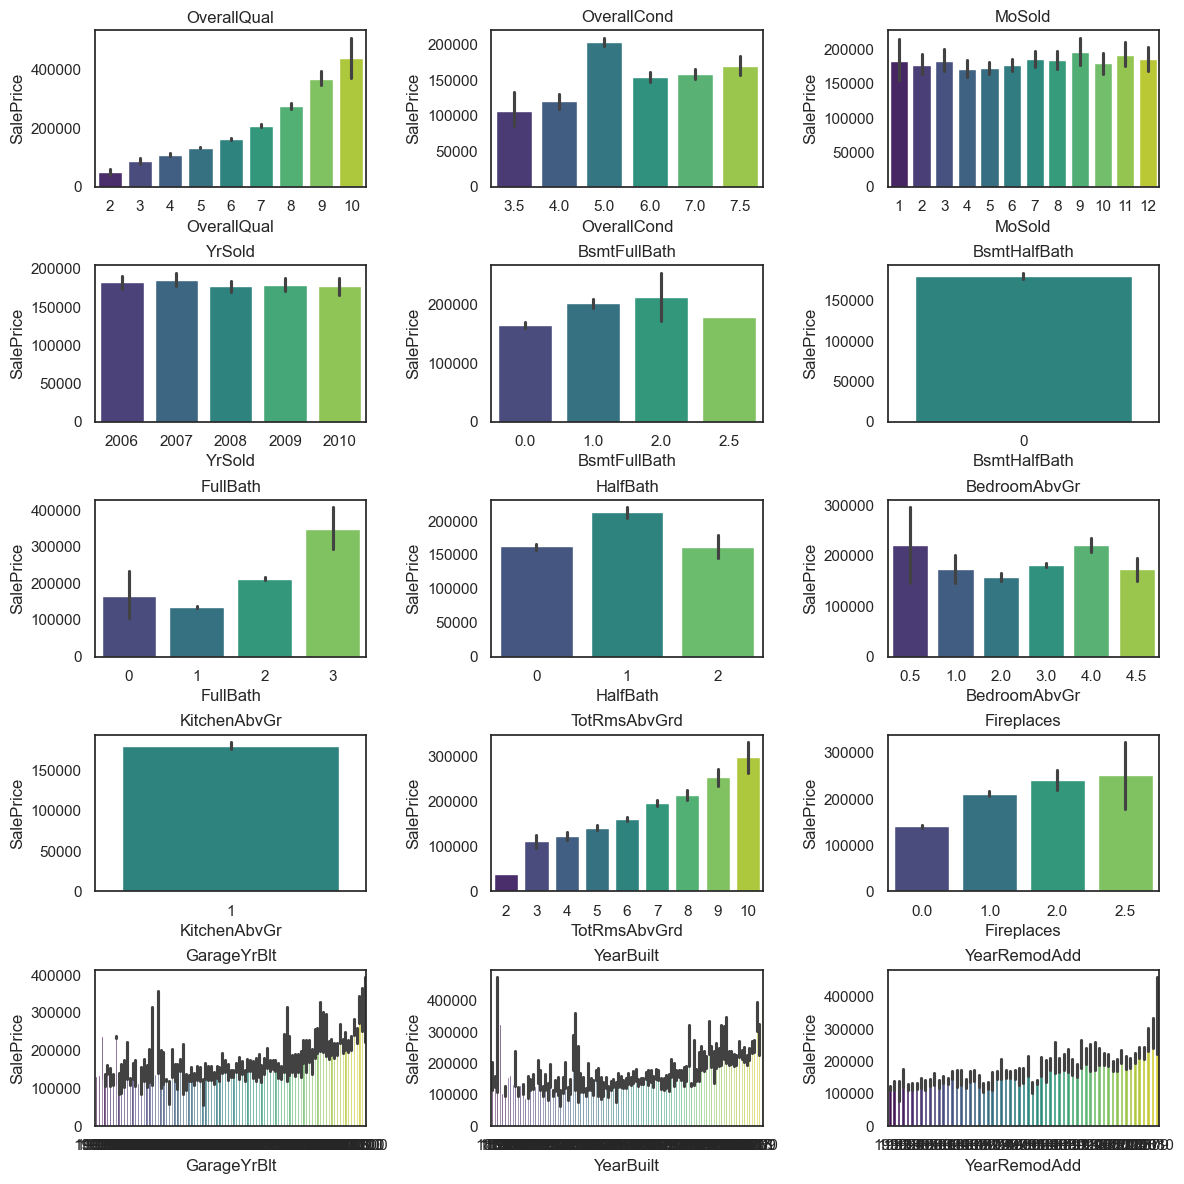

In [216]:
# Create a figure with a specified size
fig = plt.figure(figsize=(12, 12))

# List of features to plot
features = ['OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BsmtFullBath', 
            'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
            'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
            'YearBuilt', 'YearRemodAdd']

# Loop through the features and create a subplot for each
for i, feature in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.barplot(x=housing_df[feature], y=housing_df['SalePrice'], palette="viridis")
    plt.title(feature)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

**Comment:**
Following are the observations from the plots.
- 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

- 'OverallCond' : SalePrice is highest for rating 5

- 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

- 'FullBath' = 3 and 'HalfBath' = 1 have highest SalePrice 

- 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price

- 'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' : Will extract new features from to identify any trend

- 'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight

In [217]:
housing_df[['BsmtFullBath', 'KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

BsmtFullBath  KitchenAbvGr  GarageYrBlt    YearBuilt  YearRemodAdd
count   1460.000000        1460.0  1379.000000  1460.000000   1460.000000
mean       0.425000           1.0  1978.506164  1971.299315   1984.865753
std        0.517373           0.0    24.689725    30.108397     20.645407
min        0.000000           1.0  1900.000000  1885.000000   1950.000000
25%        0.000000           1.0  1961.000000  1954.000000   1967.000000
50%        0.000000           1.0  1980.000000  1973.000000   1994.000000
75%        1.000000           1.0  2002.000000  2000.000000   2004.000000
max        2.500000           1.0  2010.000000  2010.000000   2010.000000

In [218]:
print(housing_df['BsmtFullBath'].value_counts())
print(housing_df['KitchenAbvGr'].value_counts())

BsmtFullBath
0.0    856
1.0    588
2.0     15
2.5      1
Name: count, dtype: int64
KitchenAbvGr
1    1460
Name: count, dtype: int64


In [219]:
# dropping KitchenAbvGr for not having useful information
housing_df.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [220]:
housing_df[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

GarageYrBlt    YearBuilt  YearRemodAdd       YrSold
count  1379.000000  1460.000000   1460.000000  1460.000000
mean   1978.506164  1971.299315   1984.865753  2007.815753
std      24.689725    30.108397     20.645407     1.328095
min    1900.000000  1885.000000   1950.000000  2006.000000
25%    1961.000000  1954.000000   1967.000000  2007.000000
50%    1980.000000  1973.000000   1994.000000  2008.000000
75%    2002.000000  2000.000000   2004.000000  2009.000000
max    2010.000000  2010.000000   2010.000000  2010.000000

In [221]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = 2021 - housing_df[feature]

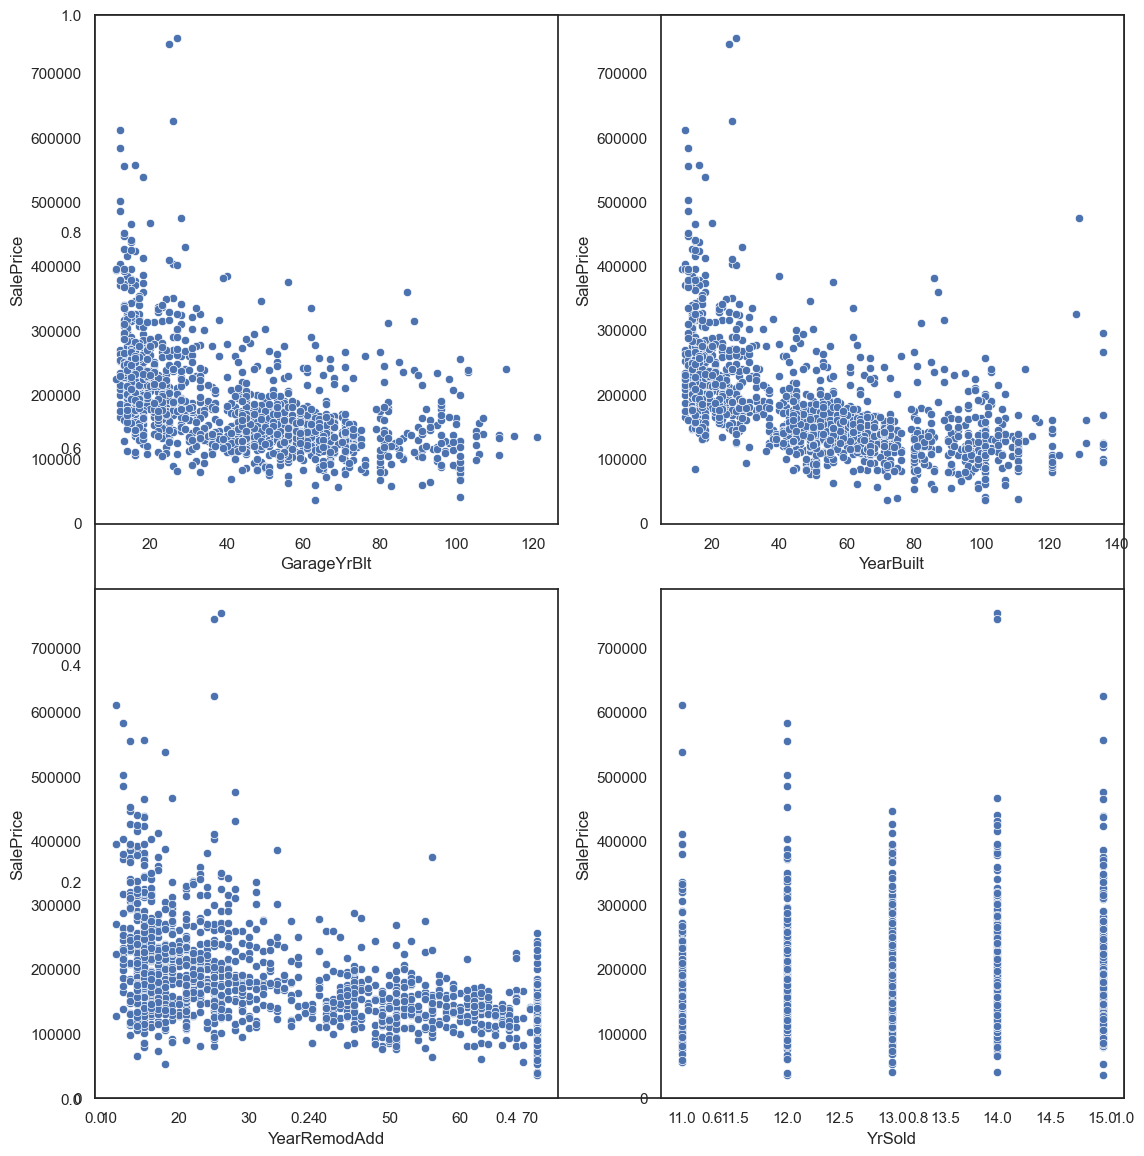

In [222]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    # sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

**Comment:**
- For most the realty properties Garage is built within last 20 years, SalePrice is more recently built garages
- SalePrice is more lower value of YearBuilt i.e. more recently build houses
- Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice 
- YrSold still does not show any significant trend

#### Missing Value Handling - Numerical Features

In [223]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.select_dtypes(exclude=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ' : ',  round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [224]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice

housing_df = housing_df[~housing_df['MasVnrArea'].isnull()]
housing_df.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

In [225]:
# Checking the number of remaining columns
housing_df.columns.shape

(73,)

**Comment:**

- GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
- GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
- TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
- TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
- Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [226]:
housing_df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(housing_df.columns.shape)

(69,)


### Analyzing Categorical Features

In [227]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Missing Value Handling - Categorical Features

In [228]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.select_dtypes(include=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 94.0
MasVnrType : 60.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [229]:
housing_df['Electrical'].isnull().sum()

1

In [230]:
housing_df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

**Comment:**
- For 'Alley', Nan means 'No access to alley'
- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
- For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
- MiscFeature - Nan means no additional features mentioned.

All these features will be imputed with meaningful values in place of missing data.

In [231]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(housing_df[mv_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [232]:
# Imputing missing values with "Not_applicable"
housing_df[mv_categorical_features] = housing_df[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(housing_df[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [233]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
housing_df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
housing_df.dropna(subset=['Electrical'], inplace=True)

In [234]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0
MasVnrType : 59.0


Missing value imputation will be done after splitting the data into train and test set to avoid data leakage.

In [235]:
housing_df.columns.shape

(68,)

**Encoding For Categorical Variables**
**Ordered Features -- to be label encoded**
'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',
'GarageCond', 'CentralAir'

**Unordered Features -- to be one hot encoded**
'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [236]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(housing_df['SalePrice'], housing_df[feature])
        plt.tight_layout()

Dividing the ordinal features into smaller segments and visualizing their impact on SalePrice.

#### Analyzing Ordered Features

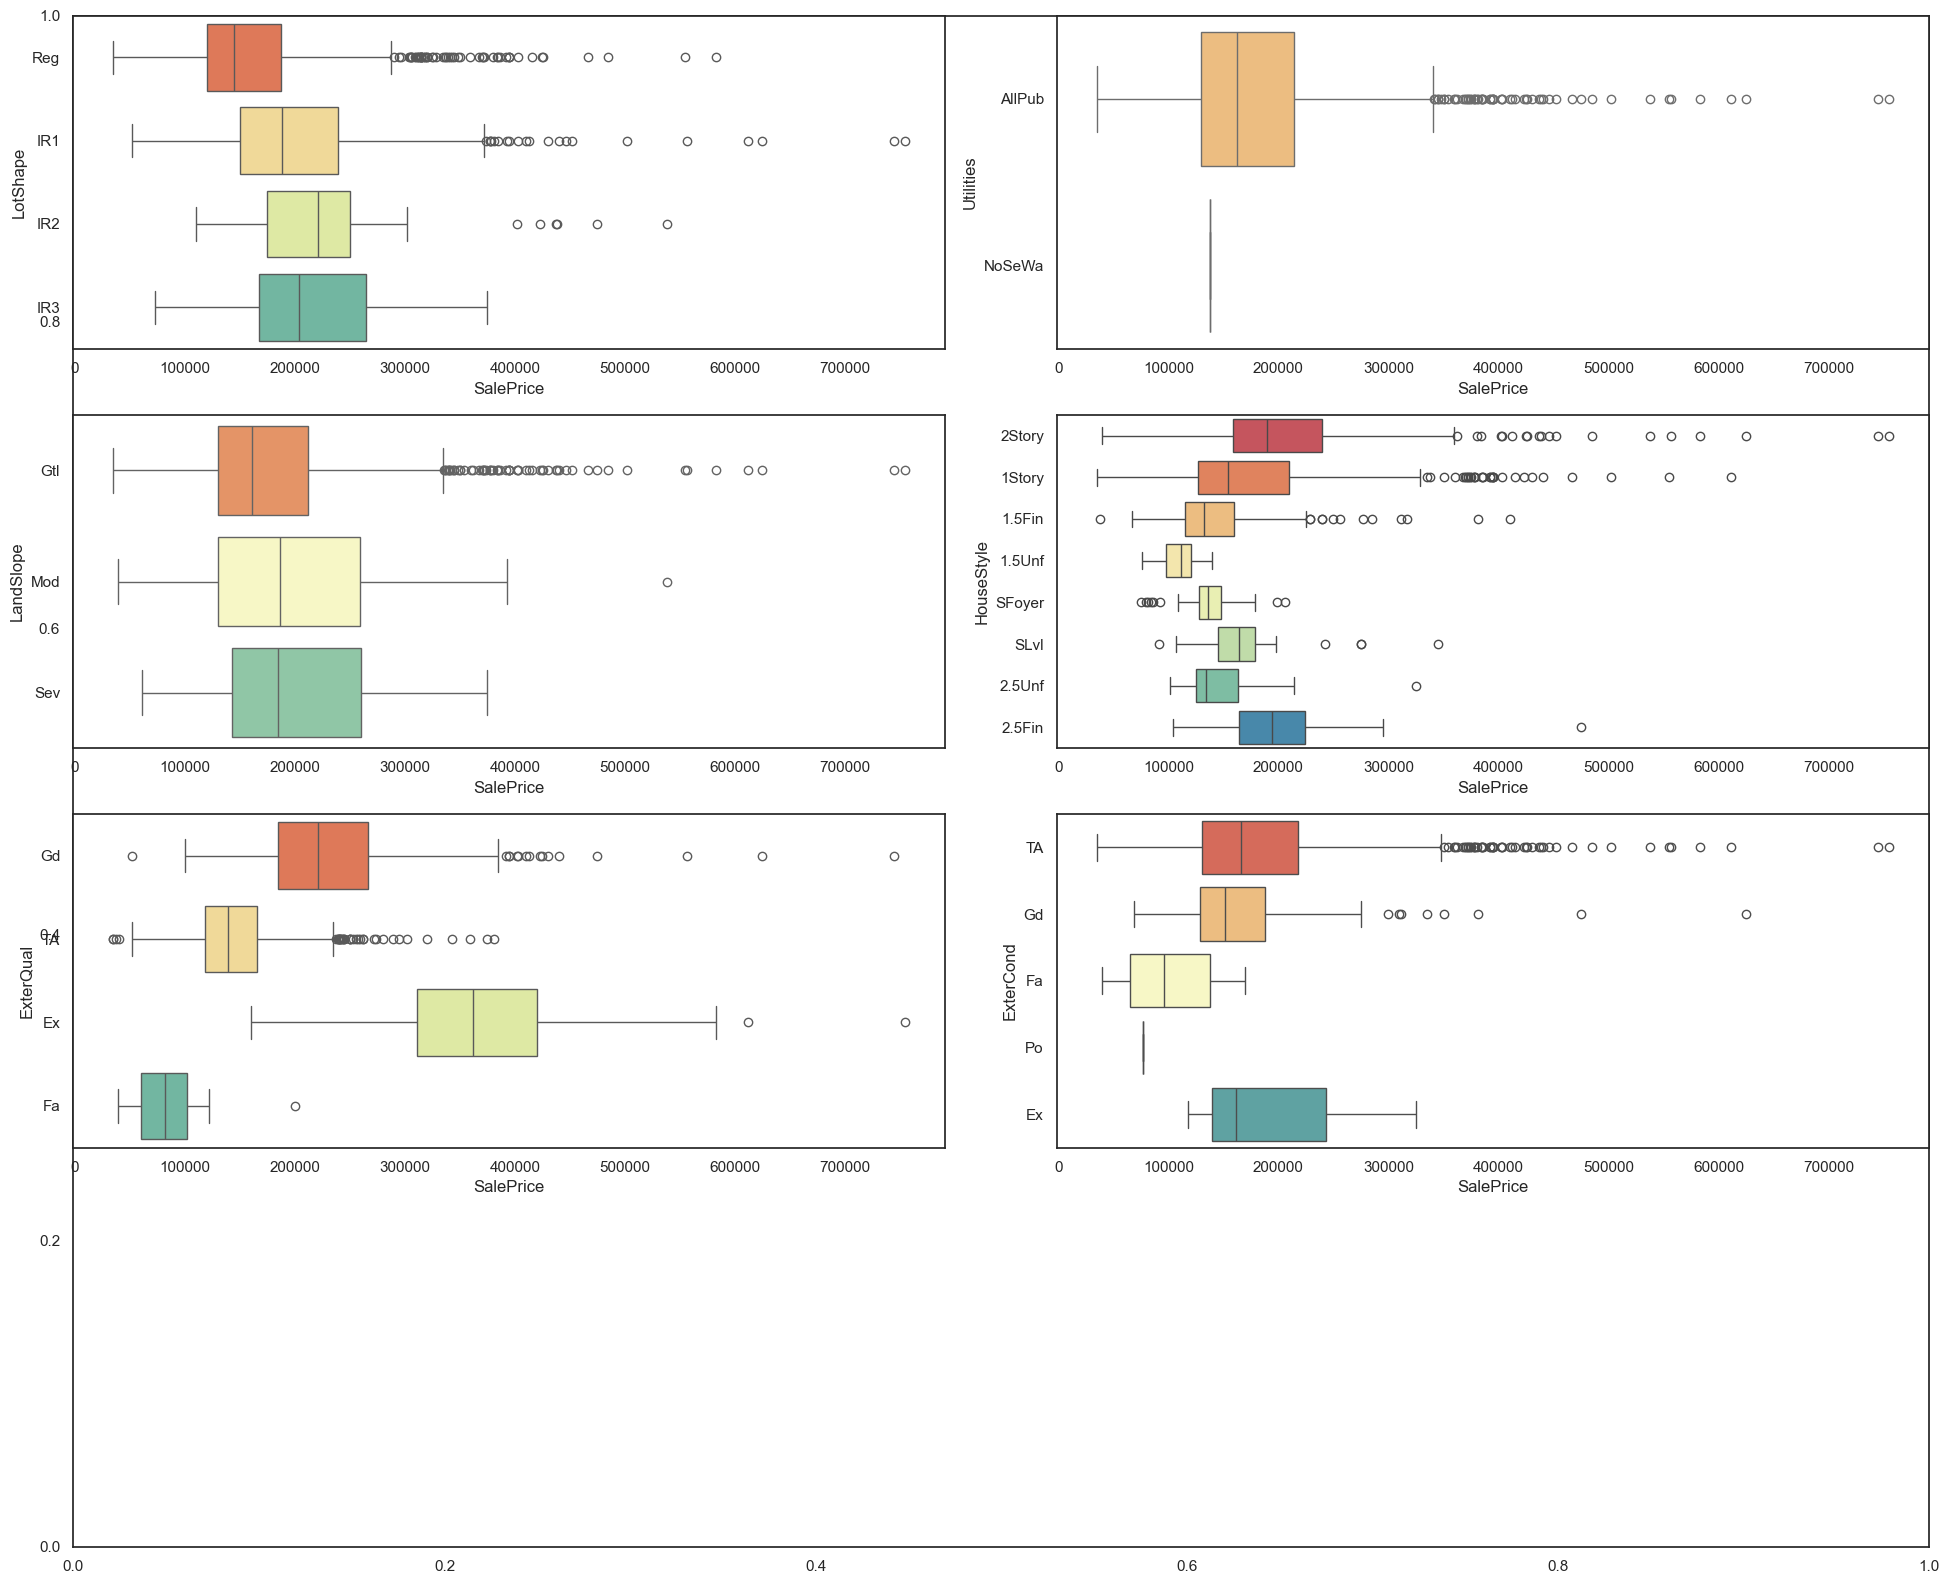

In [128]:
# Define the function to generate boxplots
def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(x=housing_df['SalePrice'], y=housing_df[feature], palette="Spectral" )
        plt.tight_layout()
    
    # Adjust the layout to prevent overlap
    plt.tight_layout()
    plt.show()

# List of categorical features to plot
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

# Call the function with the list of features
generate_boxplot(ext_features)

**Comment:**
- 'LotShape' : Slightly irregular LotShape have the highest SalePrice
- 'Utilities' : Most of the houses in the dataset have all the public utilities
- 'LandSlope' : Houses at severe land slope have lowest SalePrice
- 'HouseStyle' : 2 storied houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

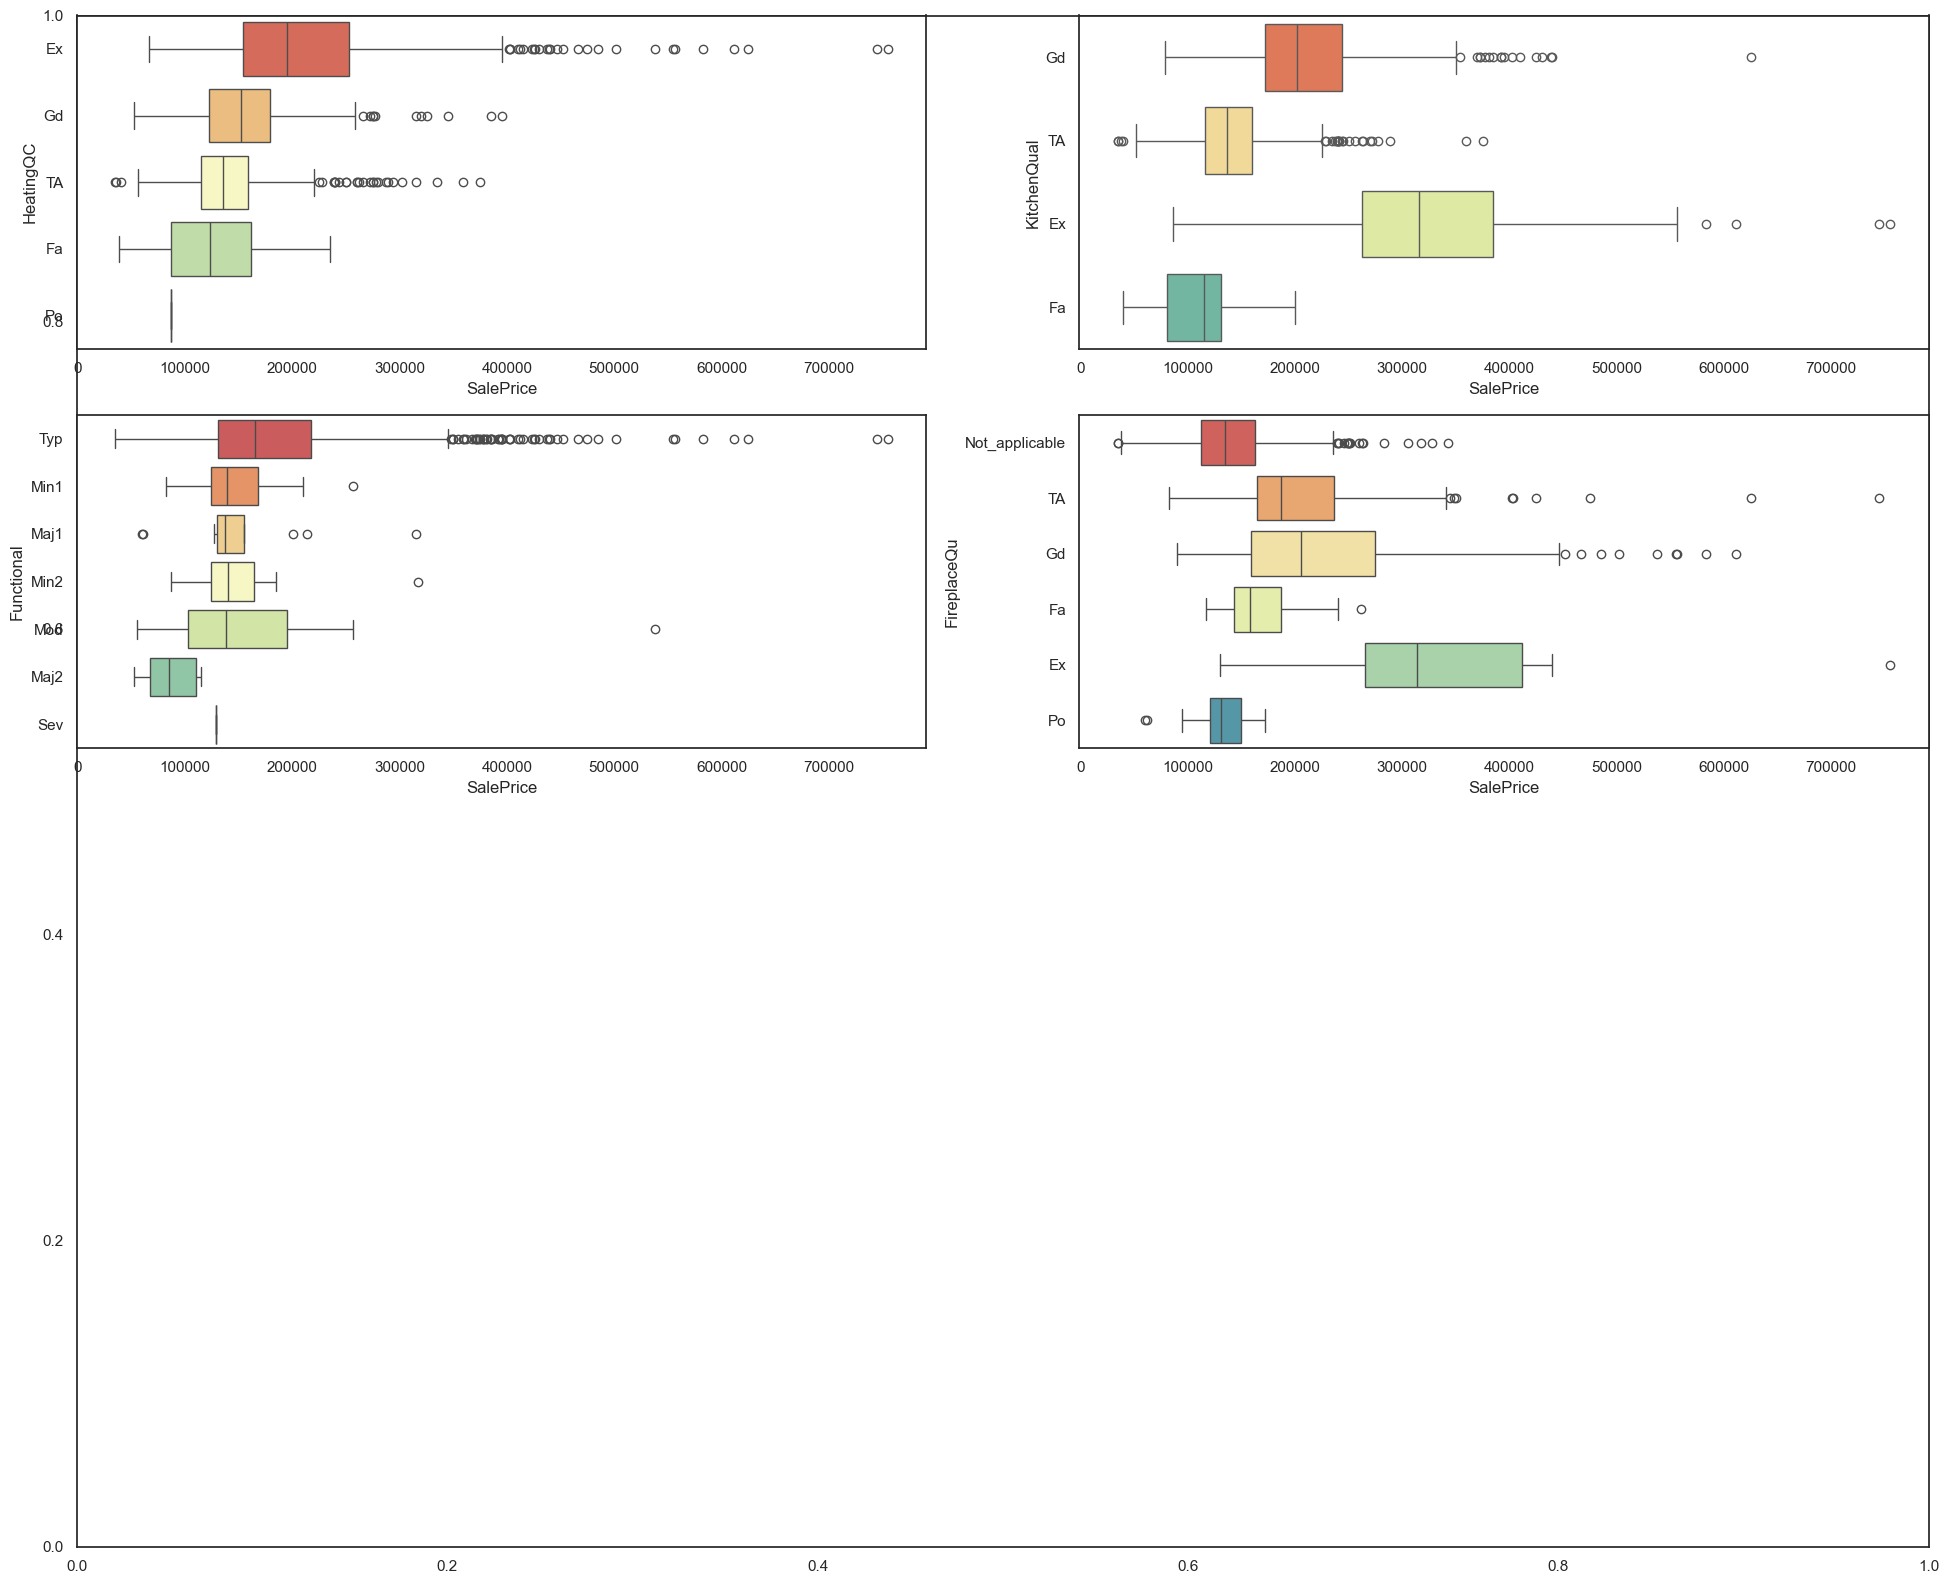

In [129]:
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(int_features)

**Comment:**

- Houses having excellent heating quality and kitchen quality have the highest SalePrice
- Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
- SalePrice range in largest for houses with average fireplace quality.

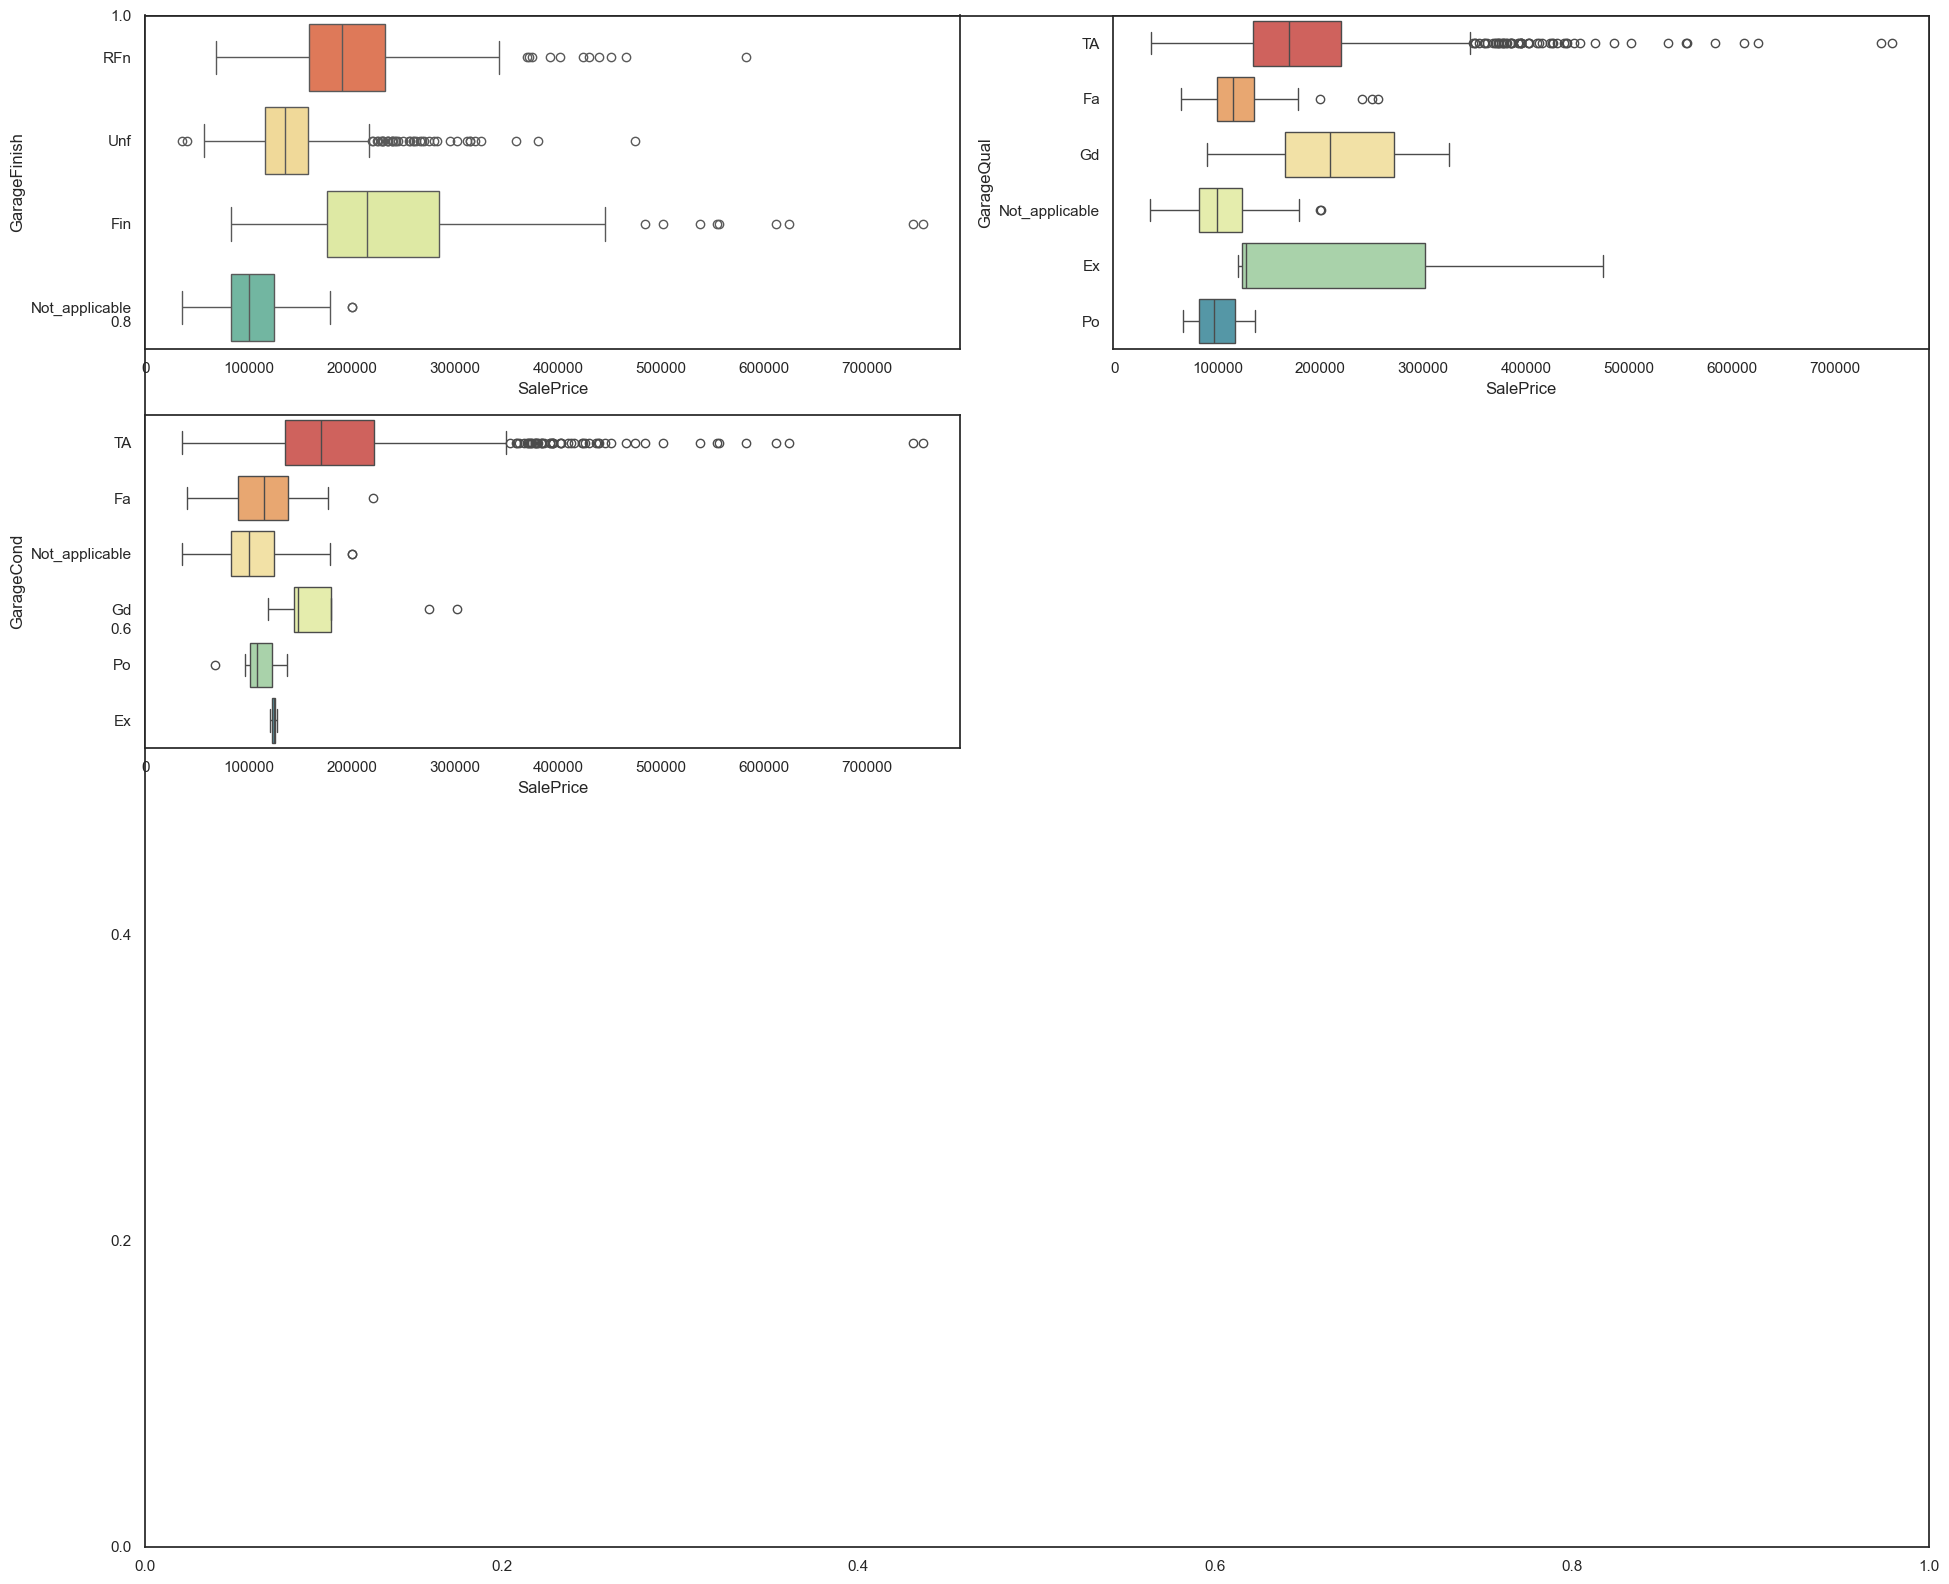

In [130]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond']

generate_boxplot(garage_features)

**Comment:**

- SalePrice is highest where garage is finished.
- The range of SalePrice is widest for Typical/Average Garage quality and condition.
- There are very few houses with excellect condition of garage.

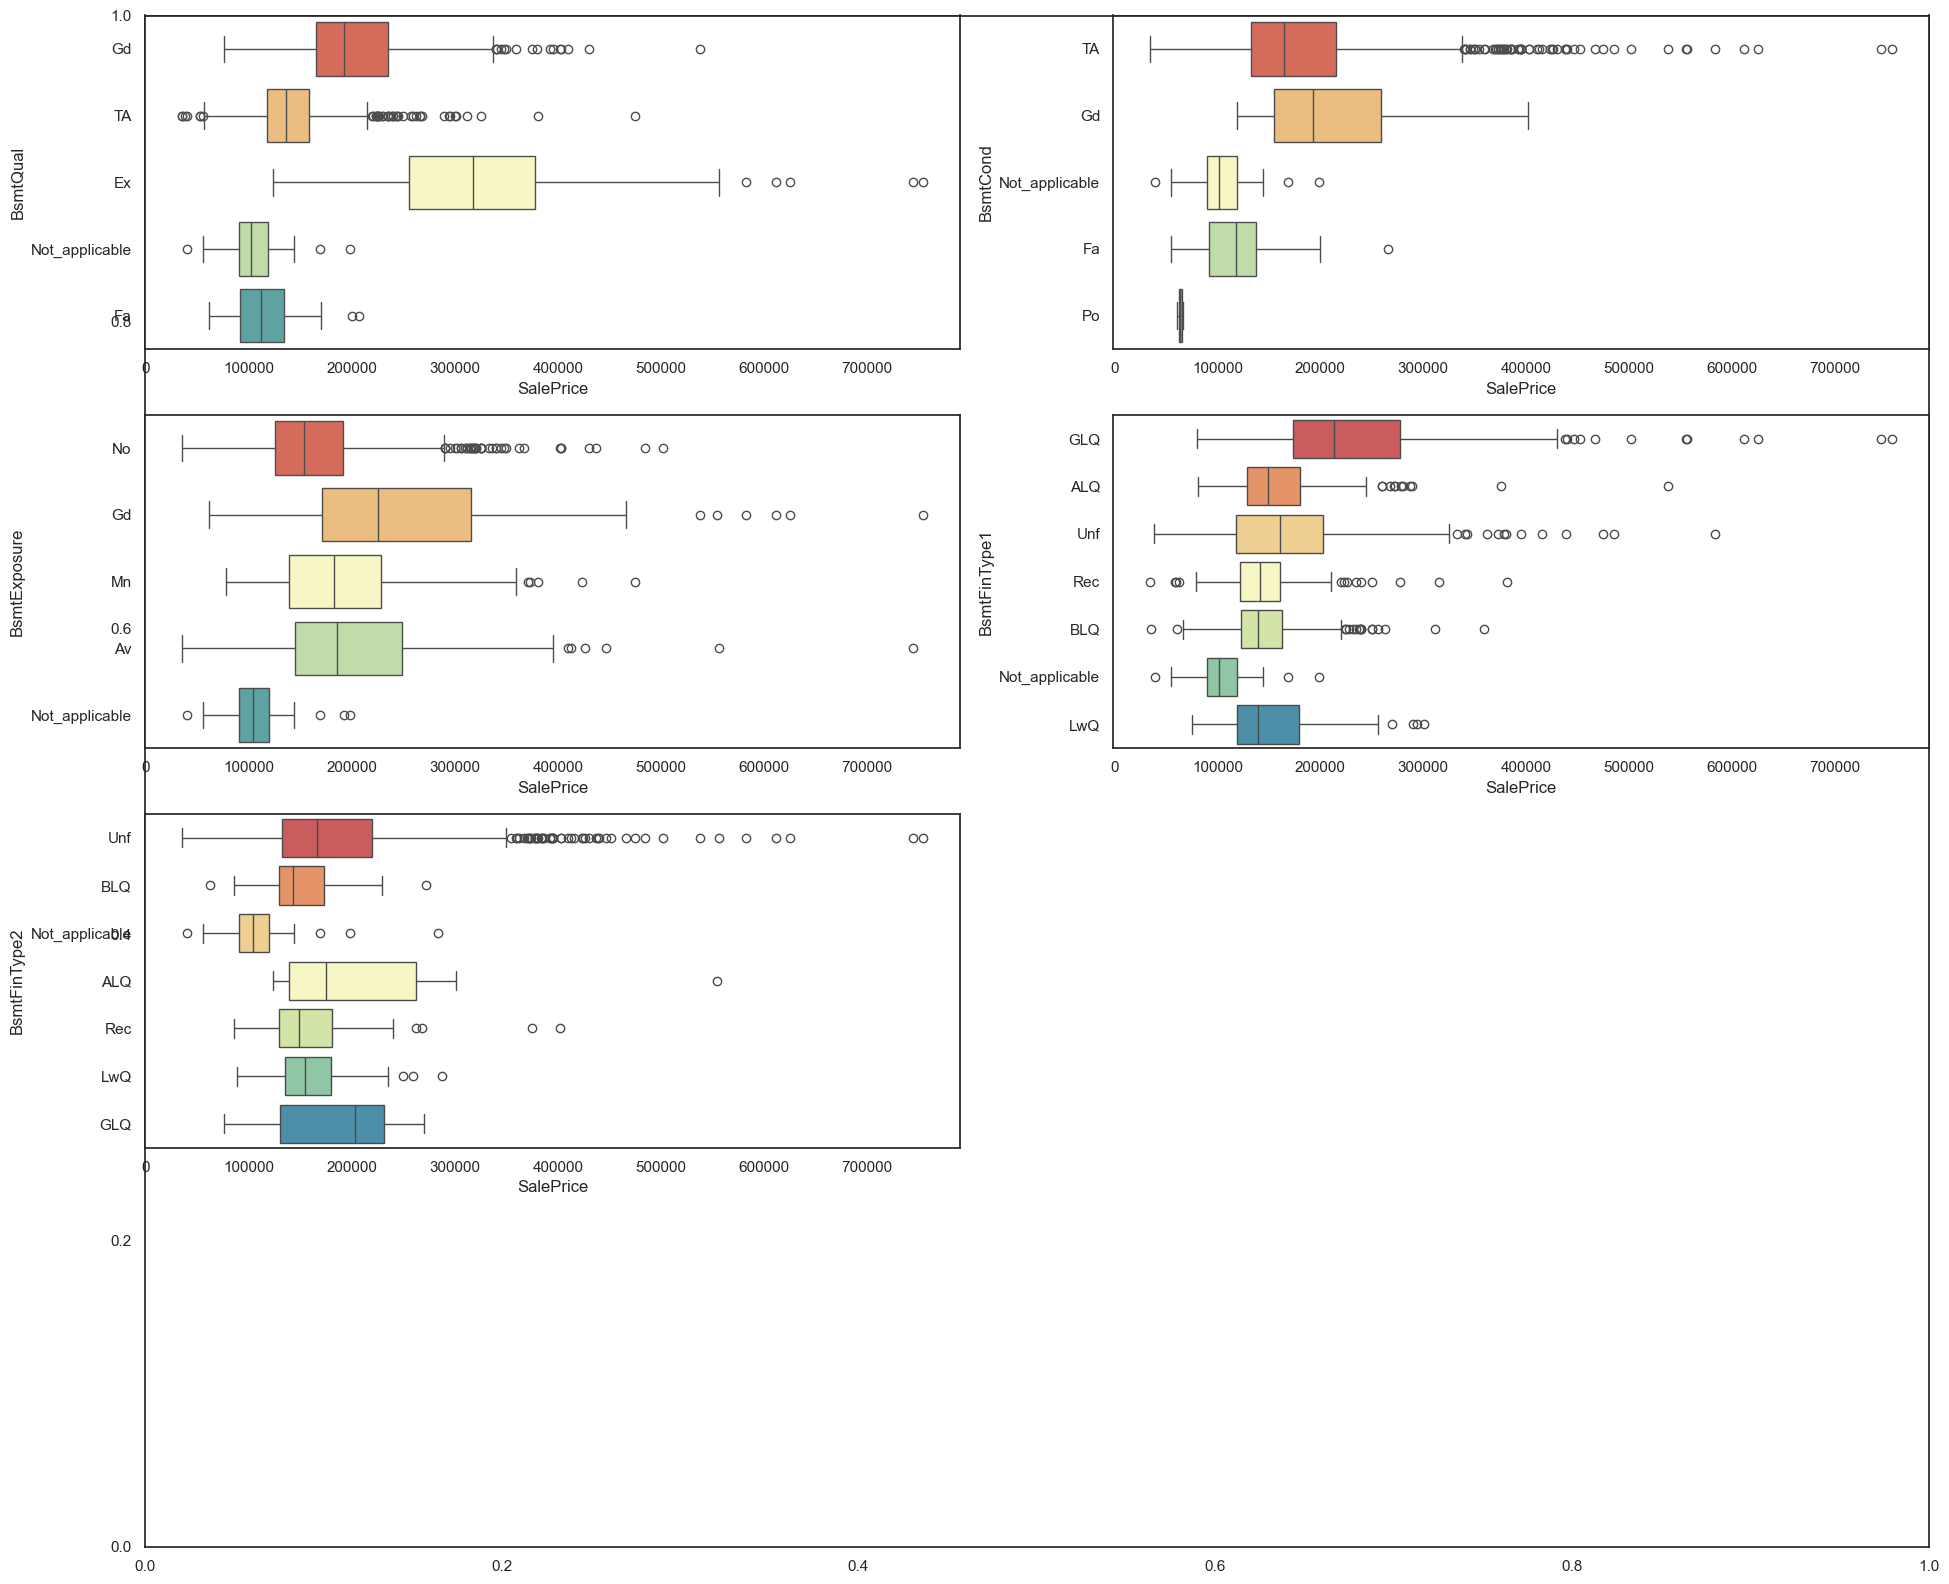

In [131]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(basement_features)

**Comment:**

- Houses with excellent quality basement have the highest SalePrice
- Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
- A lot of houses have unfinished basment or no basement (label = Not_applicable)

#### Encoding Categorical Features 

In [132]:

housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [133]:
# Checking the features after encoding

housing_df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 215.4 KB


#### Analyzing Unordered Featues

In [134]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

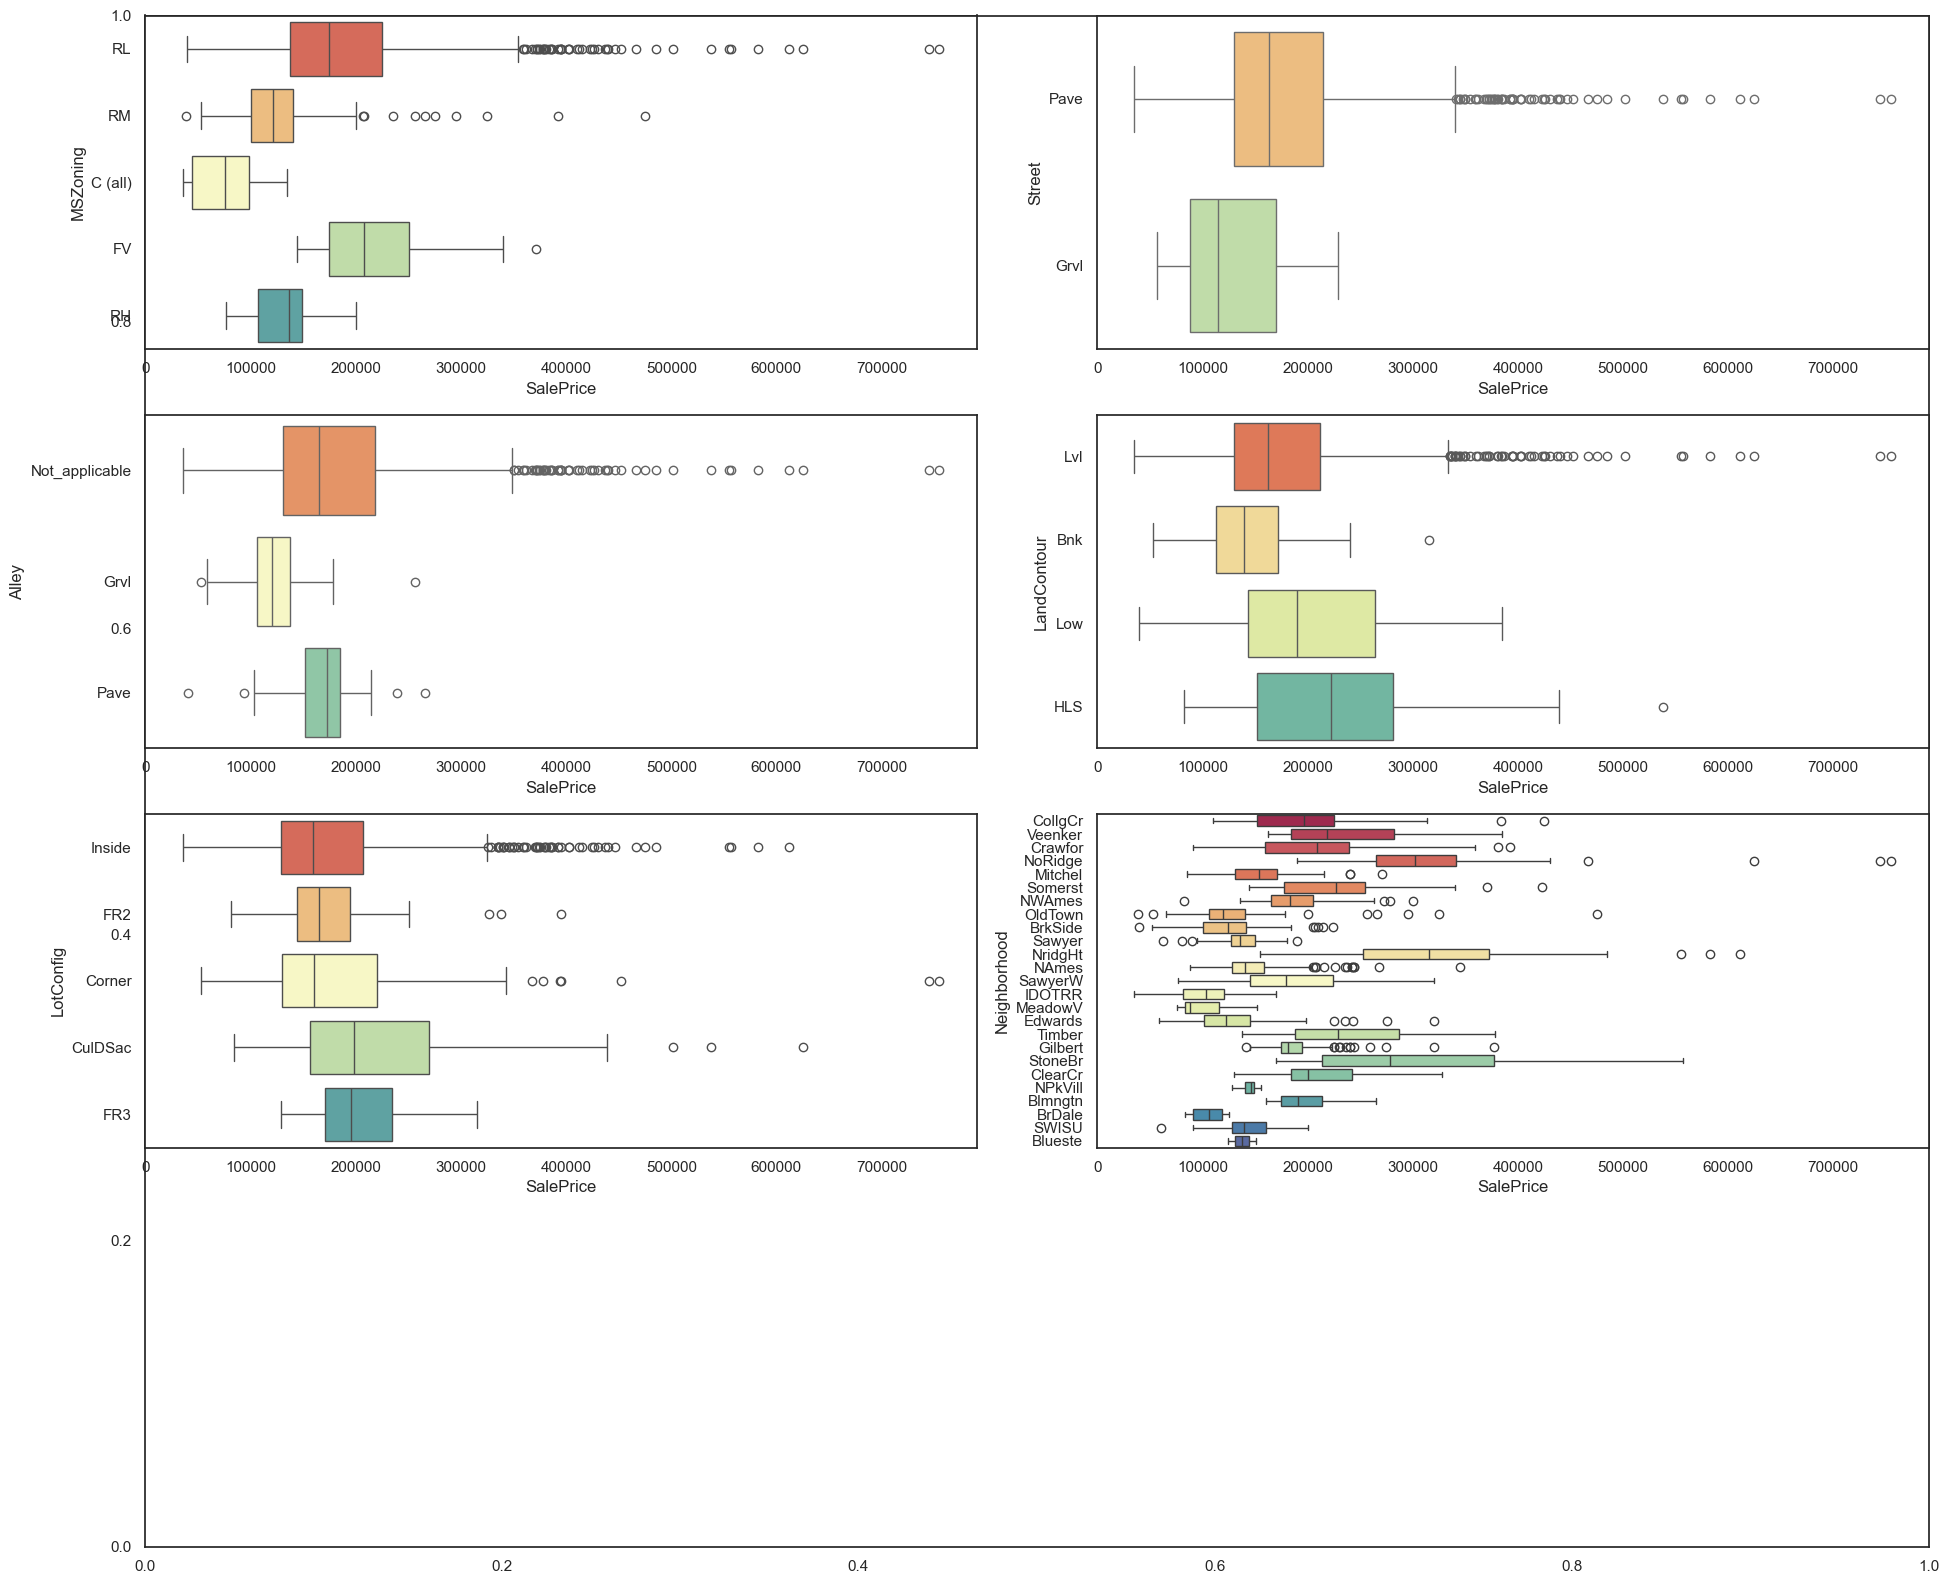

In [135]:
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

**Comment:**

- Most of the houses do not have alley
- Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
- Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

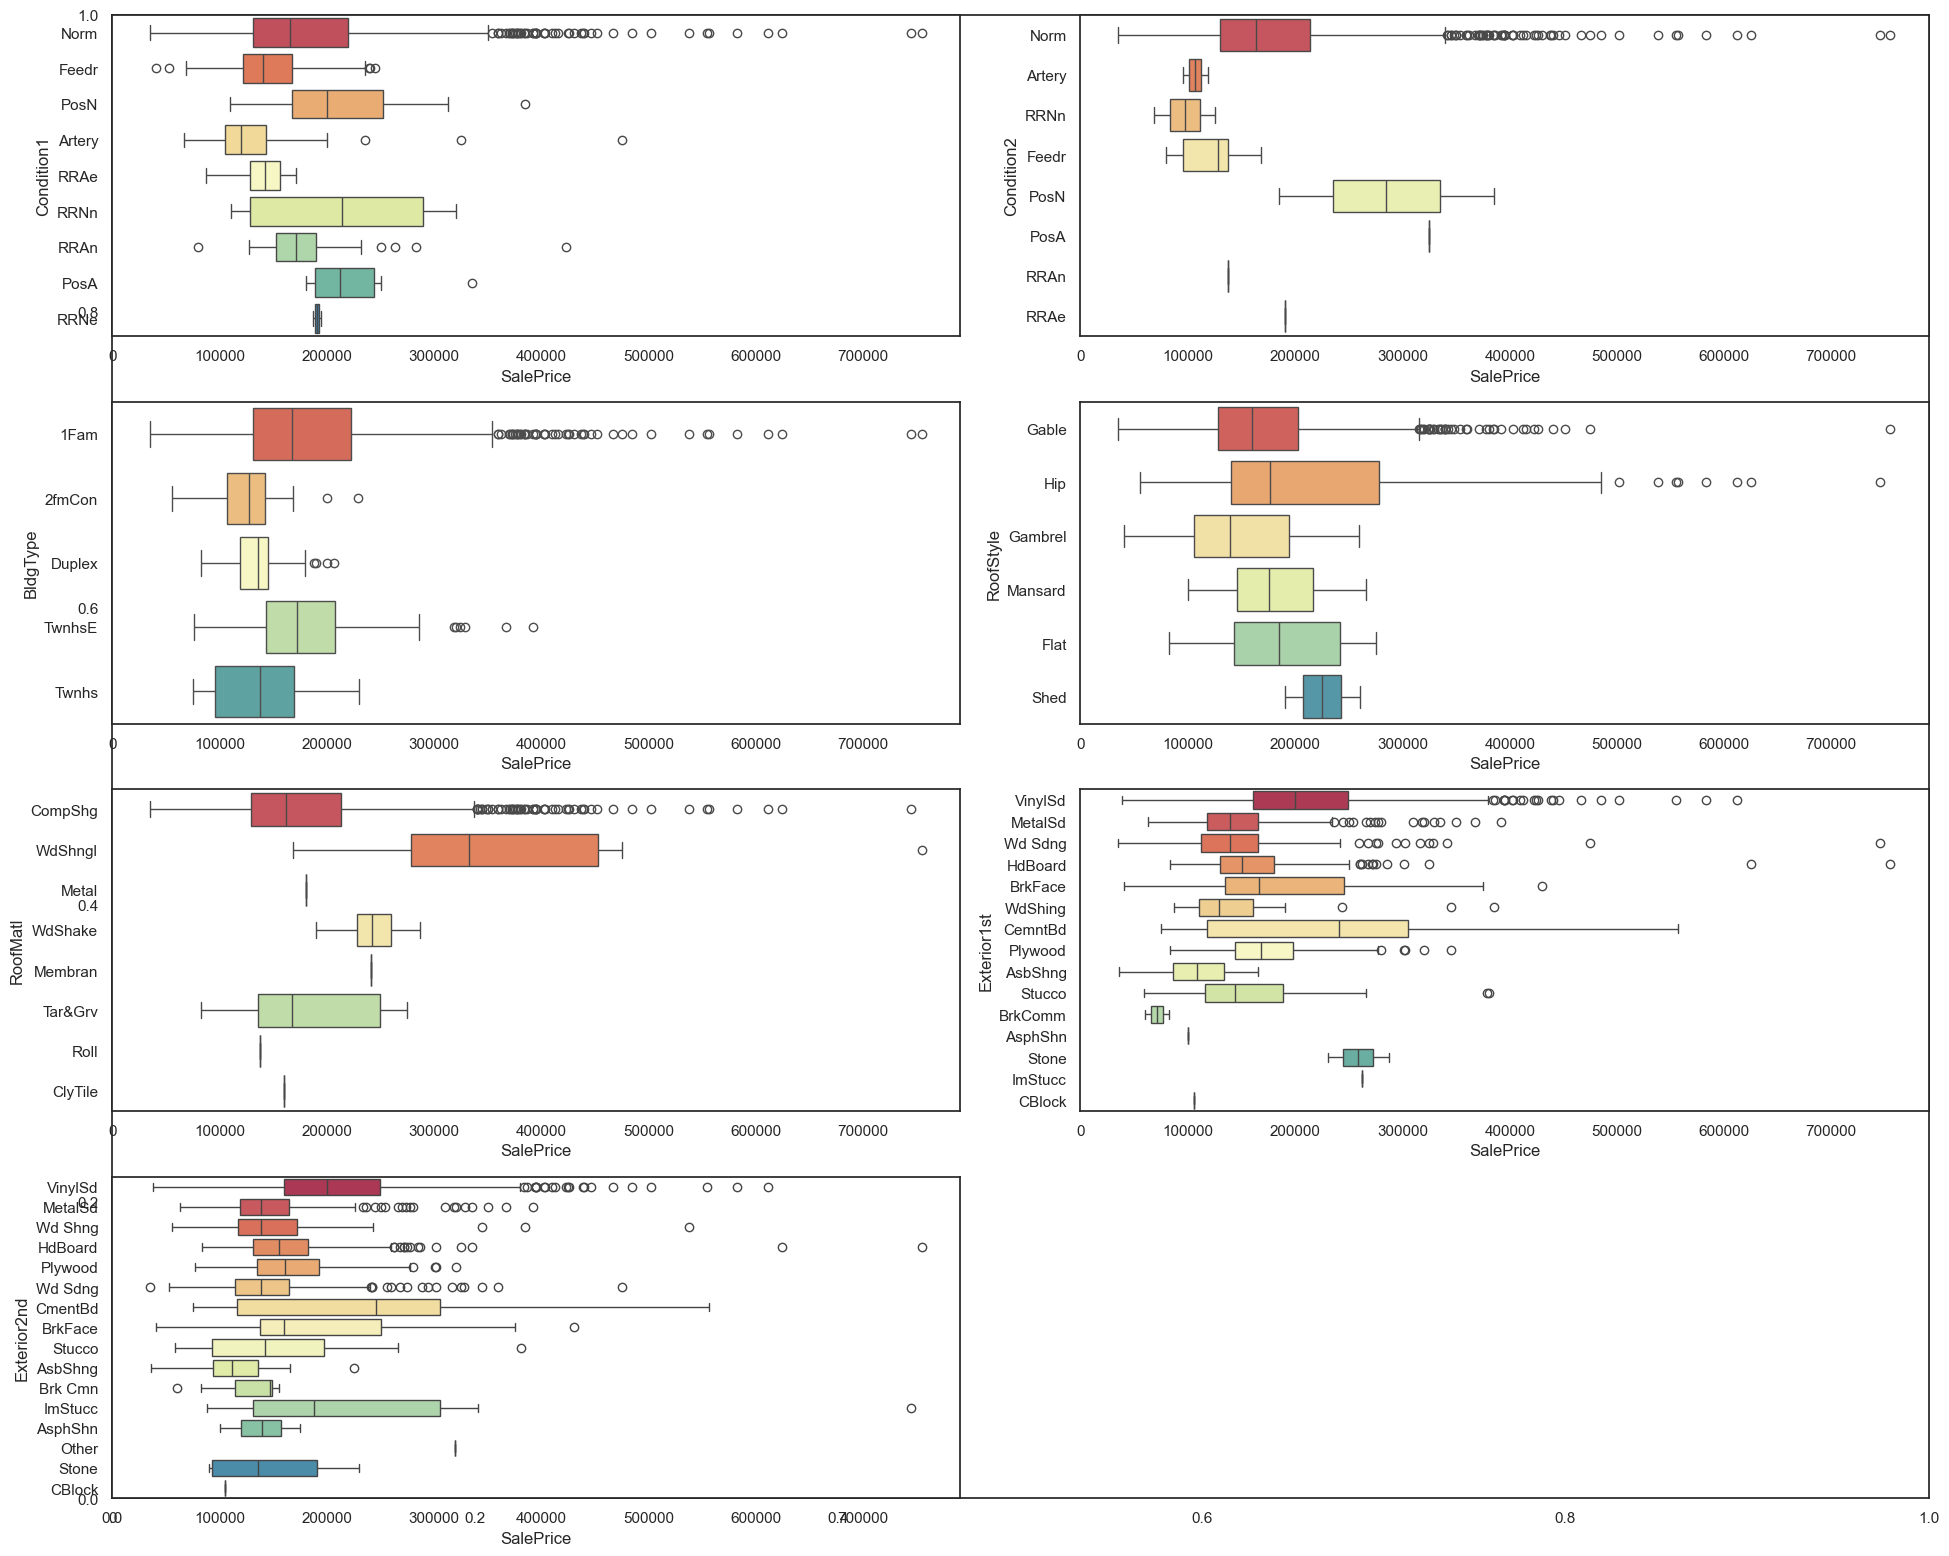

In [136]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

**Comment:**
- Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
- Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.

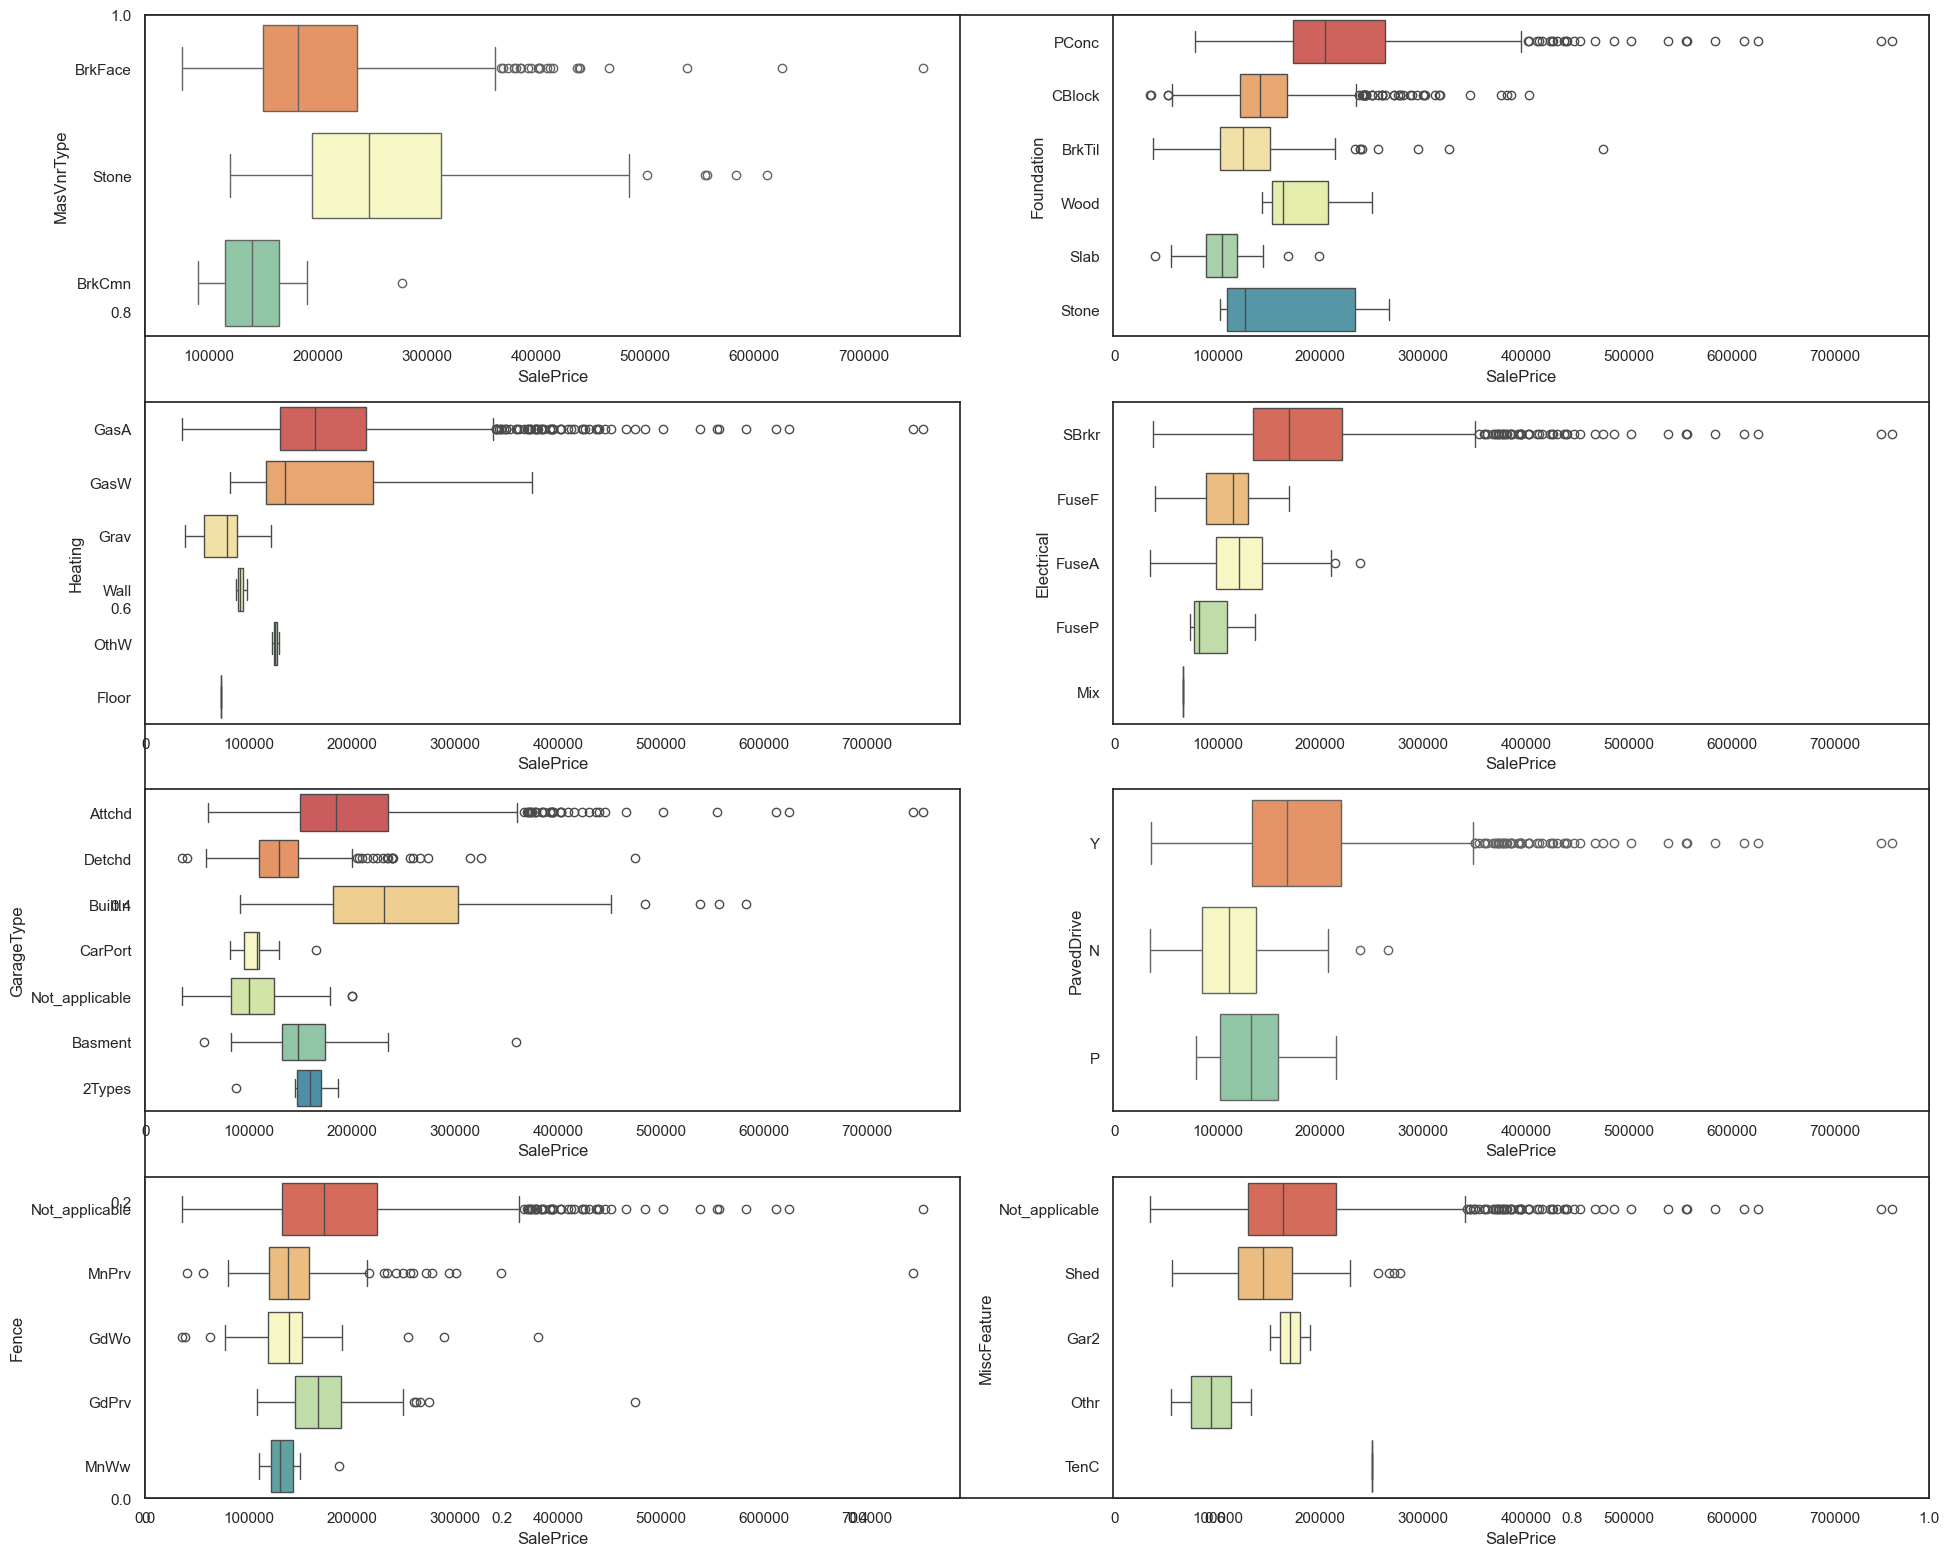

In [137]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

**Comment:**

- Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

- Houses with attached and built-in garage have high SalePrice
- Most of the houses do not have fence (Fence= Not_applicable)

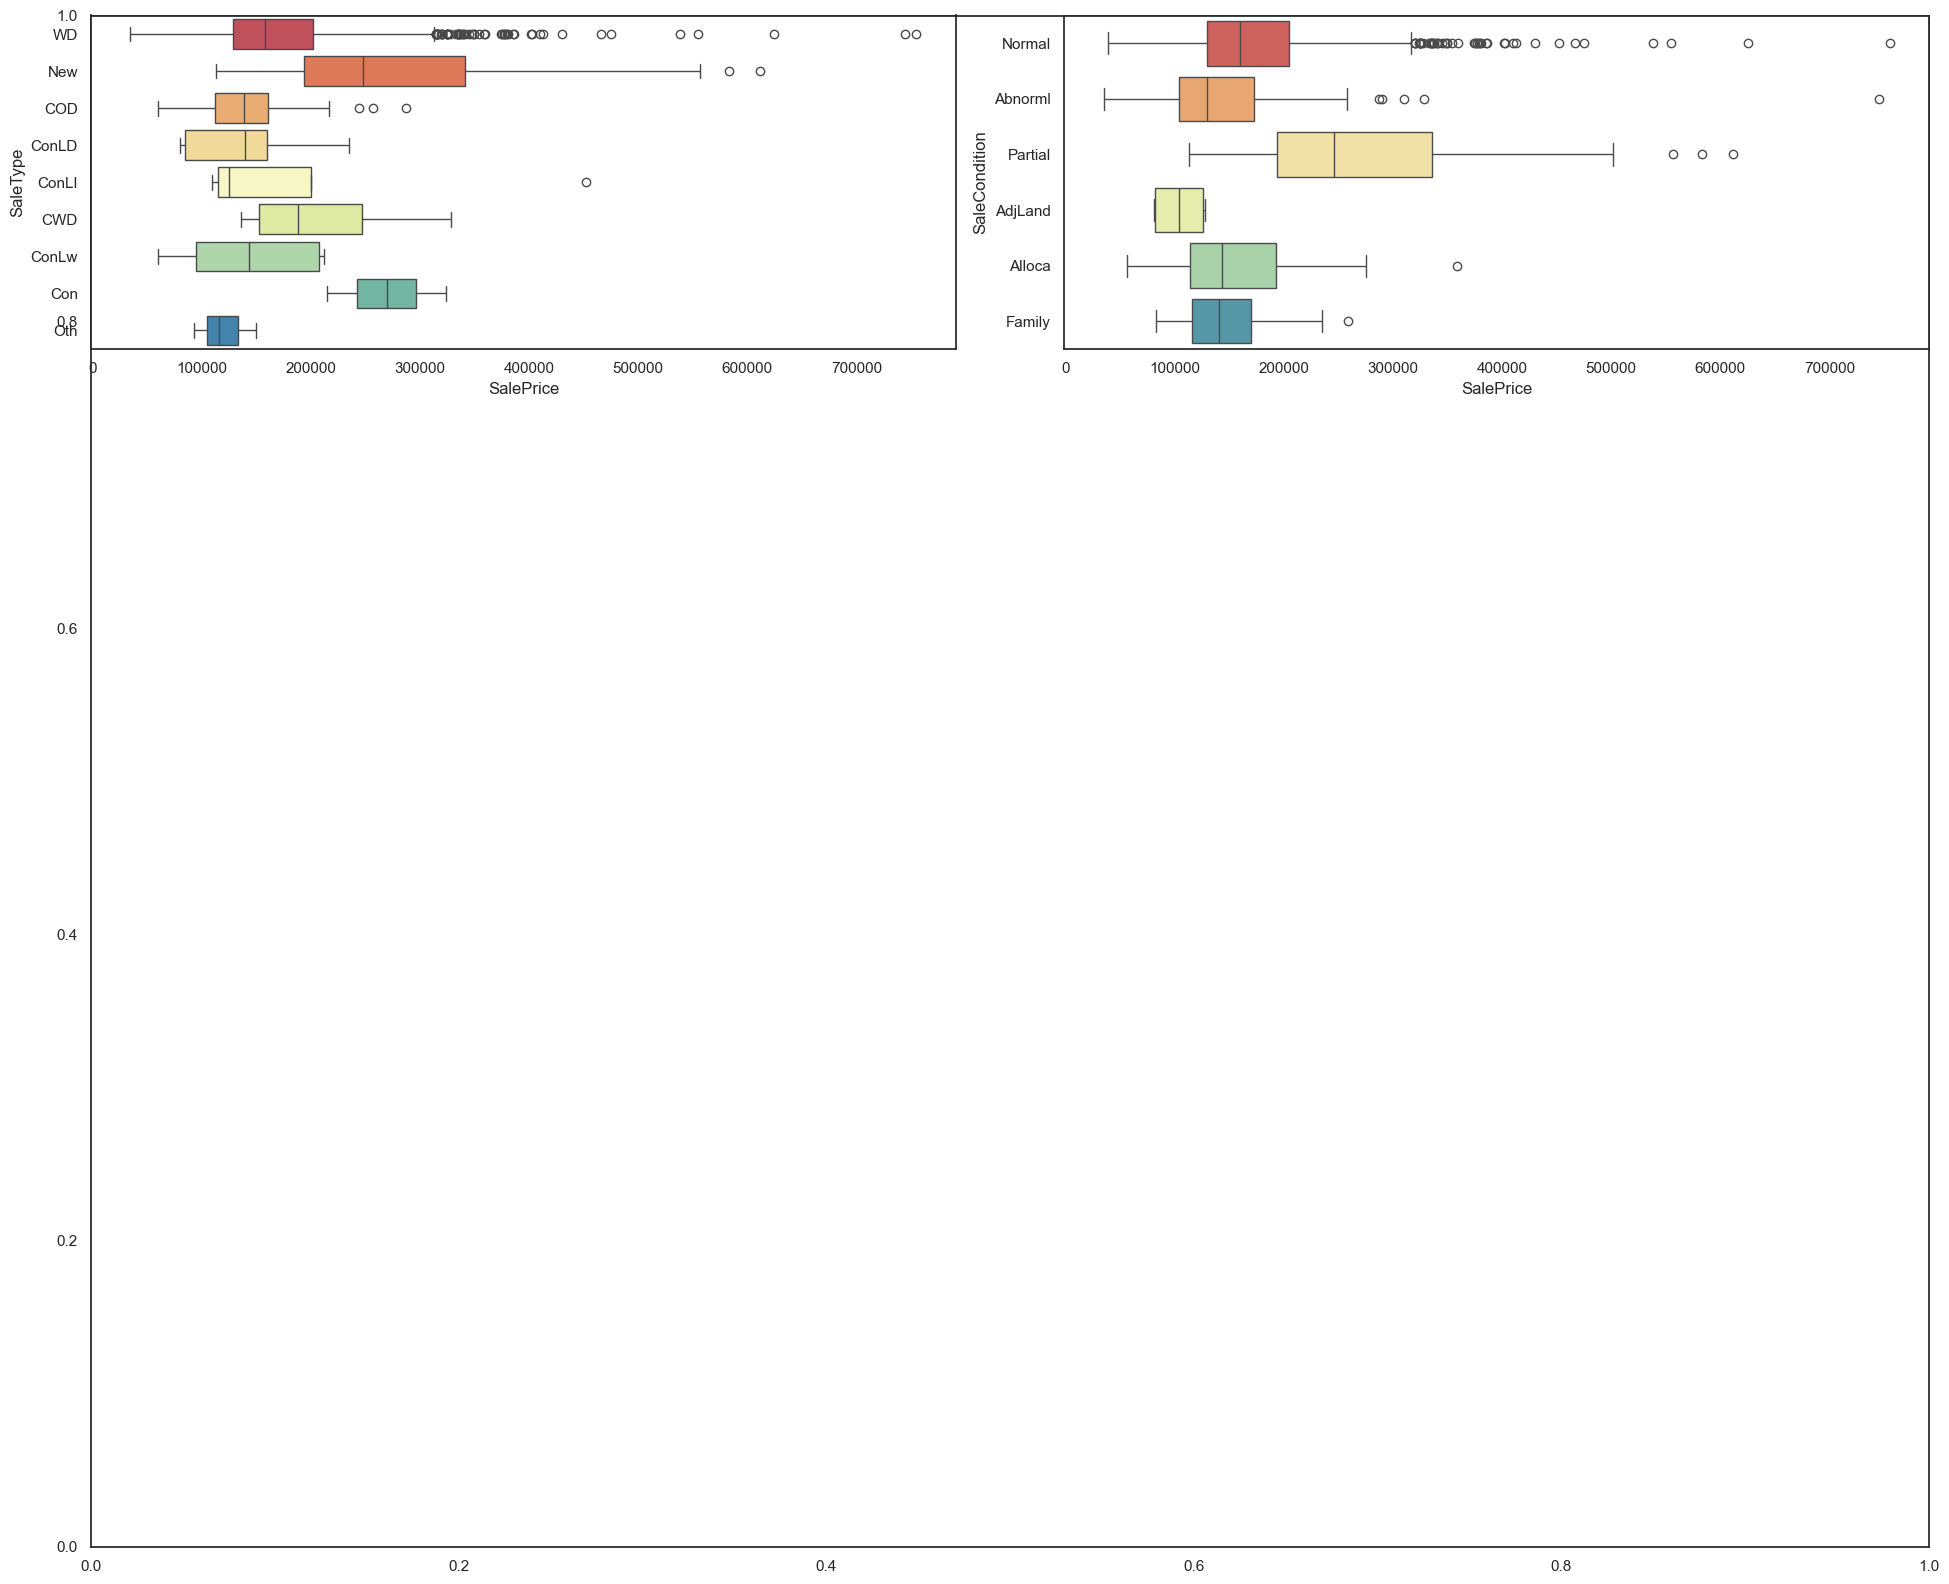

In [138]:
generate_boxplot(['SaleType','SaleCondition'])

**Comment:**

- Most of the houses are newly built, houses with warranty deed have high SalePrice
- Sale condition = Normal leads to high SalePrice

#### Encoding Categorical Variables

In [139]:
dummy_df = pd.get_dummies(housing_df[unordered_features], drop_first=True)

In [140]:
dummy_df.shape

(1451, 143)

**Comment:**

- Adding 144 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [141]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Street_Pave', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_A

In [142]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 46)


In [143]:
housing_df.shape

(1451, 68)

In [144]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_features,axis=1)

In [145]:
housing_df.shape

(1451, 91)

### Splitting into Train and Test Data

In [146]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0          60         65.0   8450.0         3          3          0   
1          20         80.0   9600.0         3          3          0   
2          60         68.0  11250.0         0          3          0   
3          70         60.0   9550.0         0          3          0   
4          60         84.0  14260.0         0          3          0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_BuiltIn  \
0           3            7          5.0         18  ...               False   
1           0            6          7.5         45  ...               False   
2           3            7          5.0         20  ...               False   
3           3            7          5.0        106  ...               False   
4           3            8          5.0         21  ...               False   

   GarageType_Detchd  GarageType_Not_applicable  PavedDrive_Y  Fence_MnPrv  \
0              False                      False          True        False   
1              False                      False          True        False   
2              False                      False          True        False   
3               True                      False          True        False   
4              False                      False          True        False   

   Fence_Not_applicable  SaleType_New  SaleType_WD  SaleCondition_Normal  \
0                  True         False         True                  True   
1                  True         False         True                  True   
2                  True         False         True                  True   
3                  True         False         True                 False   
4                  True         False         True                  True   

   SaleCondition_Partial  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 90 columns]

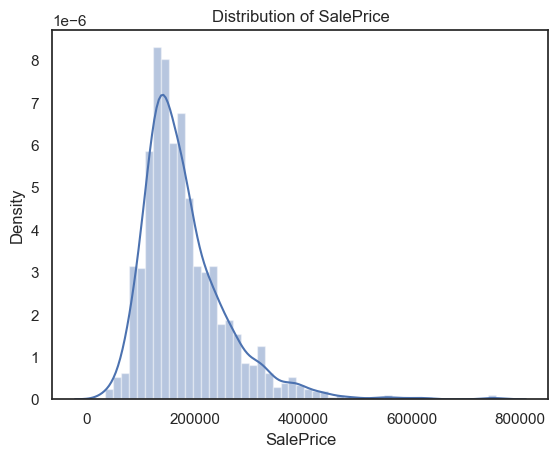

In [147]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'])
plt.show()

**Comment:** Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice. 

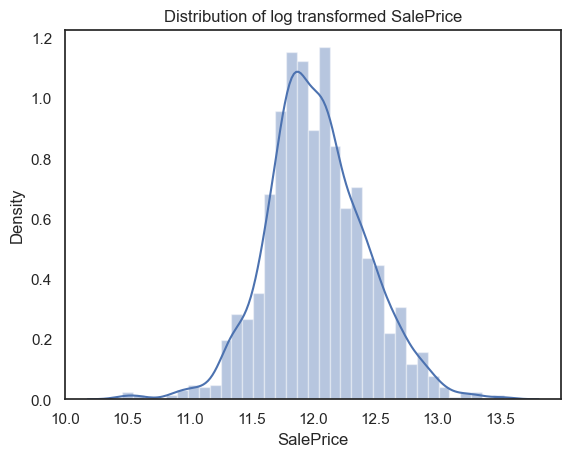

In [148]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

#### Log transformed SalePrice is normally distributed, hence transformed data will be used for model building

In [149]:
y = np.log(housing_df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [151]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 90)
(291, 90)
(1160,)
(291,)


In [152]:
X['LotFrontage'].isnull().any()

True

#### Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

In [153]:
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [154]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [155]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

### Feature Scaling

In [156]:
X_train.values

array([[50, 54.0, 6342.0, ..., True, True, False],
       [145, 27.5, 2522.0, ..., True, True, False],
       [20, 70.0, 7931.0, ..., True, True, False],
       ...,
       [50, 50.0, 9000.0, ..., True, True, False],
       [20, 48.0, 10635.0, ..., True, True, False],
       [20, 67.0, 10656.0, ..., False, False, True]], dtype=object)

In [157]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [158]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [159]:
# Checking the features after 

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.137941    -0.840191 -0.892882  0.747271   0.029374  -0.225421   
1       2.389253    -2.335542 -1.956426  0.747271   0.029374  -0.225421   
2      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
3      -0.936002     0.000000 -0.396469 -1.386037   0.029374  -0.225421   
4      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
...          ...          ...       ...       ...        ...        ...   
1155    0.128080     0.683374  0.388382 -1.386037   0.029374  -0.225421   
1156    2.389253    -2.335542 -2.214237  0.747271   0.029374  -0.225421   
1157   -0.137941    -1.065905 -0.152856  0.747271   0.029374  -0.225421   
1158   -0.936002    -1.178761  0.302352 -0.674935   0.029374  -0.225421   
1159   -0.936002    -0.106623  0.308199 -1.386037   0.029374  -0.225421   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  \
0       0.179294    -0.787347     2.0

### Initial Feature Selection with RFE

In [160]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(X, y, n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    rfe = RFE(estimator=linear_m, n_features_to_select=n)
    rfe.fit(X, y)
    
    print("Top %d features : " % n)
    rfe_ranking = list(zip(X.columns, rfe.support_, rfe.ranking_))
    
    for feature, support, rank in rfe_ranking:
        if support:
            top_n_cols.append(feature)
    print(top_n_cols)
    return top_n_cols

# Example usage:
# Ensure X_tr_scaled and y_train are defined
# X_tr_scaled = ... # Your scaled feature DataFrame
# y_train = ... # Your target variable Series

# Get the top 45, 50, and 55 features
top_45 = top_n_features(X_tr_scaled, y_train, 45)
top_50 = top_n_features(X_tr_scaled, y_train, 50)
top_55 = top_n_features(X_tr_scaled, y_train, 55)

Top 45 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'HeatingQC', 'Central

In [165]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())

In [166]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     267.6
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        06:15:09   Log-Likelihood:                 873.52
No. Observations:                1160   AIC:                            -1655.
Df Residuals:                    1114   BIC:                            -1422.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [167]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     251.7
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        06:16:04   Log-Likelihood:                 876.62
No. Observations:                1160   AIC:                            -1655.
Df Residuals:                    1111   BIC:                            -1407.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [168]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        06:17:03   Log-Likelihood:                 880.82
No. Observations:                1160   AIC:                            -1654.
Df Residuals:                    1106   BIC:                            -1381.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Comment:** By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [169]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

#### Reusable Code Block for Cross-validation, Model Building and Model Evaluation

In [170]:
def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

### Ridge Regression

In [171]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.9154378944441074
R2 score (test) :  0.8751546431180552
RMSE (train) :  0.11388030297165797
RMSE (test) :  0.1510631441094405


**Comment:** Ridge Regression model was able to achieve R2 score of 0.87 on test data i.e. 87% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1510 on test data, that means the prediction made by the model can off by 0.1510 unit.

### Lasso Regression

In [172]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.000100
lasso  Regression with  0.0001
R2 score (train) :  0.9157669354882868
R2 score (test) :  0.873695289524256
RMSE (train) :  0.11365852623169513
RMSE (test) :  0.15194348938829752


### Comparing Model Coefficients

In [180]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=20.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=20.0)  Lasso (alpha=0.0001)
MSSubClass                          -0.007275             -0.008460
LotArea                              0.033553              0.032445
LandSlope                            0.008128              0.008143
OverallQual                          0.078212              0.078281
OverallCond                          0.048587              0.050287
YearBuilt                           -0.036395             -0.042611
BsmtQual                             0.022888              0.022226
BsmtExposure                         0.010739              0.010497
BsmtFinSF1                           0.027599              0.027337
BsmtFinSF2                           0.000000              0.000000
HeatingQC                            0.013382              0.012808
CentralAir                           0.008882              0.008123
1stFlrSF                             0.120015              0.128285
2ndFlrSF                             0.100514              0.110528
BsmtFullBath                         0.018644              0.019060
BsmtHalfBath                         0.000000              0.000000
FullBath                             0.013247              0.007763
HalfBath                             0.012712              0.009198
KitchenQual                          0.015240              0.013428
Functional                          -0.025372             -0.026441
Fireplaces                           0.023550              0.022122
GarageFinish                         0.010650              0.010574
GarageArea                           0.021884              0.019406
GarageQual                           0.012075              0.013795
OpenPorchSF                          0.008780              0.008113
MSZoning_RL                          0.032985              0.036238
MSZoning_RM                          0.003504              0.006136
LotConfig_CulDSac                    0.007656              0.007217
Neighborhood_Edwards                -0.014793             -0.015188
Neighborhood_NAmes                  -0.008675             -0.008996
Neighborhood_NWAmes                 -0.007047             -0.006831
Neighborhood_NridgHt                 0.016037              0.016308
Neighborhood_Somerst                 0.024875              0.027001
Condition1_Feedr                     0.011437              0.012181
Condition1_Norm                      0.026324              0.027602
BldgType_TwnhsE                      0.006306              0.007435
RoofStyle_Gable                     -0.021972             -0.025813
RoofStyle_Hip                       -0.016645             -0.021611
Exterior1st_HdBoard                 -0.016562             -0.018474
Exterior1st_Plywood                 -0.007349             -0.007650
Exterior1st_Wd Sdng                 -0.018342             -0.019024
Exterior2nd_HdBoard                  0.006448              0.008267
Exterior2nd_Wd Sdng                  0.011336              0.012282
Foundation_PConc                     0.016256              0.015317
GarageType_Attchd                    0.014987              0.016615
GarageType_Detchd                    0.015987              0.018884
GarageType_Not_applicable            0.008277              0.010691
PavedDrive_Y                         0.009275              0.008824
SaleCondition_Normal                 0.028187              0.029367
SaleCondition_Partial                0.033647              0.034708

In [181]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[292838 220191 134554 115531 143885]


### Final Model

Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [182]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

Lasso (alpha=0.0001)
1stFlrSF                               0.128285
2ndFlrSF                               0.110528
OverallQual                            0.078281
OverallCond                            0.050287
MSZoning_RL                            0.036238
SaleCondition_Partial                  0.034708
LotArea                                0.032445
SaleCondition_Normal                   0.029367
Condition1_Norm                        0.027602
BsmtFinSF1                             0.027337
Neighborhood_Somerst                   0.027001
BsmtQual                               0.022226
Fireplaces                             0.022122
GarageArea                             0.019406
BsmtFullBath                           0.019060
GarageType_Detchd                      0.018884
GarageType_Attchd                      0.016615
Neighborhood_NridgHt                   0.016308
Foundation_PConc                       0.015317
GarageQual                             0.013795
KitchenQual                            0.013428
HeatingQC                              0.012808
Exterior2nd_Wd Sdng                    0.012282
Condition1_Feedr                       0.012181
GarageType_Not_applicable              0.010691
GarageFinish                           0.010574
BsmtExposure                           0.010497
HalfBath                               0.009198
PavedDrive_Y                           0.008824
Exterior2nd_HdBoard                    0.008267
LandSlope                              0.008143
CentralAir                             0.008123
OpenPorchSF                            0.008113
FullBath                               0.007763
BldgType_TwnhsE                        0.007435
LotConfig_CulDSac                      0.007217
MSZoning_RM                            0.006136
BsmtHalfBath                           0.000000
BsmtFinSF2                             0.000000
Neighborhood_NWAmes                   -0.006831
Exterior1st_Plywood                   -0.007650
MSSubClass                            -0.008460
Neighborhood_NAmes                    -0.008996
Neighborhood_Edwards                  -0.015188
Exterior1st_HdBoard                   -0.018474
Exterior1st_Wd Sdng                   -0.019024
RoofStyle_Hip                         -0.021611
RoofStyle_Gable                       -0.025813
Functional                            -0.026441
YearBuilt                             -0.042611

In [183]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'MSZoning_RL',
       'SaleCondition_Partial', 'LotArea', 'SaleCondition_Normal',
       'Condition1_Norm', 'BsmtFinSF1'],
      dtype='object')

## Summary:

- First the housing data is read and analyzed dividing the features into numerical and categorical types.


- SalePrice is the target column here.


- All the features are then analyzed, missing data handling, outlier detection, data cleaning are done.

- Trend of SalePrice is observed for change in individual features.

- New features are extracted, redundant features dropped and categorical features are encoded accordingly.

- Then the data in split into train and test data and feature scaling is performed.

- Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.

- Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.

- Top 50 features are selected through RFE and adjusted R-square. 50 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']

- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.
Optimum alpha = 20.0 for ridge and 0.0001 for lasso model.

- Model evaluation is done with R2 score and Root Mean Square Error.

- Lasso Regression is chosen as final model for having slightly better R-square value on test data.

- Out of 50 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'MSZoning_RL',  'SaleCondition_Partial', 'LotArea', 'SaleCondition_Normal'   'Condition1_Norm', 'BsmtFinSF1']

- Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable. 

- Predicted value of SalePrice is tranformed into its original scale by performing antilog. 

----------------

### Subjective Questions Code

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [184]:
##Optimal Value of alpha for ridge and lasso regression (importing values already computed)

optimal_alpha_ridge = 20.0        #(Computed Above: For Ridge Regression)
optimal_alpha_lasso = 0.0001    #(Computed Above: For Lasso Regression)

In [185]:
# Model Building
ridge_model = Ridge(alpha=40.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=40.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=40.0
R2 score (train) :  0.9147
R2 score (test) :  0.876
RMSE (train) :  0.1144
RMSE (test) :  0.1505


In [186]:
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9157
R2 score (test) :  0.8741
RMSE (train) :  0.1137
RMSE (test) :  0.1517


In [187]:
model_coefficients['Ridge (alpha = 40.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.0002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=20.0)  Lasso (alpha=0.0001)  \
MSSubClass                          -0.007275             -0.008460   
LotArea                              0.033553              0.032445   
LandSlope                            0.008128              0.008143   
OverallQual                          0.078212              0.078281   
OverallCond                          0.048587              0.050287   
YearBuilt                           -0.036395             -0.042611   
BsmtQual                             0.022888              0.022226   
BsmtExposure                         0.010739              0.010497   
BsmtFinSF1                           0.027599              0.027337   
BsmtFinSF2                           0.000000              0.000000   
HeatingQC                            0.013382              0.012808   
CentralAir                           0.008882              0.008123   
1stFlrSF                             0.120015              0.128285   
2ndFlrSF                             0.100514              0.110528   
BsmtFullBath                         0.018644              0.019060   
BsmtHalfBath                         0.000000              0.000000   
FullBath                             0.013247              0.007763   
HalfBath                             0.012712              0.009198   
KitchenQual                          0.015240              0.013428   
Functional                          -0.025372             -0.026441   
Fireplaces                           0.023550              0.022122   
GarageFinish                         0.010650              0.010574   
GarageArea                           0.021884              0.019406   
GarageQual                           0.012075              0.013795   
OpenPorchSF                          0.008780              0.008113   
MSZoning_RL                          0.032985              0.036238   
MSZoning_RM                          0.003504              0.006136   
LotConfig_CulDSac                    0.007656              0.007217   
Neighborhood_Edwards                -0.014793             -0.015188   
Neighborhood_NAmes                  -0.008675             -0.008996   
Neighborhood_NWAmes                 -0.007047             -0.006831   
Neighborhood_NridgHt                 0.016037              0.016308   
Neighborhood_Somerst                 0.024875              0.027001   
Condition1_Feedr                     0.011437              0.012181   
Condition1_Norm                      0.026324              0.027602   
BldgType_TwnhsE                      0.006306              0.007435   
RoofStyle_Gable                     -0.021972             -0.025813   
RoofStyle_Hip                       -0.016645             -0.021611   
Exterior1st_HdBoard                 -0.016562             -0.018474   
Exterior1st_Plywood                 -0.007349             -0.007650   
Exterior1st_Wd Sdng                 -0.018342             -0.019024   
Exterior2nd_HdBoard                  0.006448              0.008267   
Exterior2nd_Wd Sdng                  0.011336              0.012282   
Foundation_PConc                     0.016256              0.015317   
GarageType_Attchd                    0.014987              0.016615   
GarageType_Detchd                    0.015987              0.018884   
GarageType_Not_applicable            0.008277              0.010691   
PavedDrive_Y                         0.009275              0.008824   
SaleCondition_Normal                 0.028187              0.029367   
SaleCondition_Partial                0.033647              0.034708   

                           Ridge (alpha = 40.0)  Lasso (alpha = 0.0002)  
MSSubClass                            -0.006076               -0.007960  
LotArea                                0.034229                0.032412  
LandSlope                              0.008059                0.008142  
OverallQual                            0.077946                0.078579  
OverallCond                        

In [188]:
model_coefficients.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(1)

Ridge (alpha=20.0)  Lasso (alpha=0.0001)  Ridge (alpha = 40.0)  \
1stFlrSF            0.120015              0.128285              0.113261   

          Lasso (alpha = 0.0002)  
1stFlrSF                 0.12804

In [189]:
model_coefficients.sort_values(by='Ridge (alpha = 40.0)', ascending=False).head(1)

Ridge (alpha=20.0)  Lasso (alpha=0.0001)  Ridge (alpha = 40.0)  \
1stFlrSF            0.120015              0.128285              0.113261   

          Lasso (alpha = 0.0002)  
1stFlrSF                 0.12804

---------

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [192]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(5)

Ridge (alpha=20.0)  Lasso (alpha=0.0001)  Ridge (alpha = 40.0)  \
1stFlrSF               0.120015              0.128285              0.113261   
2ndFlrSF               0.100514              0.110528              0.092506   
OverallQual            0.078212              0.078281              0.077946   
OverallCond            0.048587              0.050287              0.047068   
MSZoning_RL            0.032985              0.036238              0.029784   

             Lasso (alpha = 0.0002)  
1stFlrSF                   0.128040  
2ndFlrSF                   0.109868  
OverallQual                0.078579  
OverallCond                0.050290  
MSZoning_RL                0.034815

In [237]:
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'MSZoning_RL'], axis=1)

In [238]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'MSZoning_RL'], axis=1)

In [239]:
alpha = 0.0001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [240]:
lasso_model.coef_

array([ 0.00339715,  0.05970688,  0.0038624 ,  0.02526696,  0.0427721 ,
        0.01667939,  0.04093653,  0.        ,  0.02627733,  0.02233585,
        0.01125765,  0.        ,  0.08635832,  0.04695457,  0.05783608,
       -0.02454873,  0.05650117,  0.01351186,  0.06195429,  0.00699699,
        0.01717171, -0.0163178 ,  0.01143514, -0.01653106, -0.00600759,
       -0.00590365,  0.02012756,  0.00798558,  0.00574238,  0.01851949,
       -0.00363155, -0.03957564, -0.01135689, -0.01446062, -0.00703582,
       -0.03178959,  0.00426769,  0.02756787,  0.0200682 ,  0.01989511,
        0.00868513,  0.01094684,  0.01485257,  0.02870124,  0.03827989])

In [241]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

Lasso
FullBath     0.086358
GarageArea   0.061954
LotArea      0.059707
KitchenQual  0.057836
Fireplaces   0.056501